# Business requirement, Problem statement & Goal of the case study.

In the telecom industry, there are multiple service providers. The customers has the option to select their service provider from the whole lot of service providers in the industry. It is seen that, there are around 15% to 25% of the annual churn rate. It is extremely costly and time consuming to get a new customer into the network compared to retaining the existing customers. 

Hence as part of this case study we will identify the potential customers who are highely likely to churn(meaning customers who might leave the current service provider to a new provider). 

**Goal of this case study:**

As part of this case study we will analyse the customer level data from a leading telecom firm, build various predictive models to identify customers at high risk of churn, identify the main indicators/reasons of churn and to provide suitable recommendations to overcome this problem of churn. 

We will follow the below steps for our case study:

1. Data Understanding
2. Data cleaning. 
3. Filtering the HVC Customers from the month 6 & 7.
4. Deriving the target variable (Churn variable).
5. Data Preparation for model building. 
6. Model Building and Evaluation. 
7. Conclusion. 


## Step1: Data Understanding. 

In [1]:
# Importing necessary libraries. 

import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Getting the input csv file. 

churn = pd.read_csv('telecom_churn_data.csv')
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [418]:
# Getting the shape of the input dataset. 

churn.shape

(99999, 226)

So We have a total of 99999 rows and 226 columns in our input file.

In [419]:
# Getting the information of the data. 

churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [420]:
# Getting the list of columns from the input file. 

churn.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

## Step 2. Data Cleaning. 

As part of this data cleaning step, we will:

1. Dropping id and date columns. 
2. Check & Impute missing values for meaningful NA's in numerical columns.
3. Check & Impute missing values for categorical columns.
4. Drop columns that have very high missing values. 
5. Use fancy imputer method or mean/ median for imputing columns with less missing values. 


### 2.1 Dropping id and date columns

We could see that the columns mobile_number,  circle_id and date are variables which are not useful for our analysis. Hence we drop those columns. 


In [421]:
# Dropping the id, mobile number, and date columns from the data. 

id_cols_to_drop = ['mobile_number','circle_id',
                   'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
                   'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',
                   'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']

churn = churn.drop(id_cols_to_drop,axis=1)


### 2.2 Analysing the missing value

In [422]:
# missing value percentage wise

#round(100*(churn.isnull().sum()/len(churn)),5)
churn.isnull().sum()

loc_og_t2o_mou        1018 
std_og_t2o_mou        1018 
loc_ic_t2o_mou        1018 
arpu_6                0    
arpu_7                0    
arpu_8                0    
arpu_9                0    
onnet_mou_6           3937 
onnet_mou_7           3859 
onnet_mou_8           5378 
onnet_mou_9           7745 
offnet_mou_6          3937 
offnet_mou_7          3859 
offnet_mou_8          5378 
offnet_mou_9          7745 
roam_ic_mou_6         3937 
roam_ic_mou_7         3859 
roam_ic_mou_8         5378 
roam_ic_mou_9         7745 
roam_og_mou_6         3937 
roam_og_mou_7         3859 
roam_og_mou_8         5378 
roam_og_mou_9         7745 
loc_og_t2t_mou_6      3937 
loc_og_t2t_mou_7      3859 
loc_og_t2t_mou_8      5378 
loc_og_t2t_mou_9      7745 
loc_og_t2m_mou_6      3937 
loc_og_t2m_mou_7      3859 
loc_og_t2m_mou_8      5378 
loc_og_t2m_mou_9      7745 
loc_og_t2f_mou_6      3937 
loc_og_t2f_mou_7      3859 
loc_og_t2f_mou_8      5378 
loc_og_t2f_mou_9      7745 
loc_og_t2c_mou_6    

Observation:
- There are four groups of columns based on missing percentage.
- One group having  missing values between 3 to 7 % . 
- Another group of columns having with missing value around 0.001%. 
- One more more group columns with missing percentage around 1 % .
- Finally we have a group where missing value are above 70 % percentage.
    

Lets analyse these columns before imputing

#### 2.2.1 Treating columns with missing value around 1 %.These are:
- loc_og_t2o_mou 
- std_og_t2o_mou 
- loc_ic_t2o_mou 


In [423]:
print(churn.loc_og_t2o_mou.value_counts())
print(churn.std_og_t2o_mou.value_counts())
print(churn.loc_ic_t2o_mou.value_counts())

0.0    98981
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64


Observation:
- All the values in these three are 0 or missing. So we cannot get any significant information from it.
- Drop the columns.

In [424]:
churn.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'], axis = 1 , inplace = True)

#### 2.2.2 Treating the columns with missing percentage aroun 0.001% : Drop rows
- Drop those rows for which missing value in some columns are 0.001% .
- As the missing percentage is very less the number of rows will hardly impacted.


In [425]:
# List of columns having missing value around 0.001%
missing_very_low_percntg = ['aon',
'total_og_mou_6','total_og_mou_7','total_og_mou_8','total_og_mou_9',
'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_ic_mou_9',

'total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_num_9',
'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9',
'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','max_rech_amt_9',
'last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','last_day_rch_amt_9',

'vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_2g_mb_9',
'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','vol_3g_mb_9',

'monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_2g_9',
'monthly_3g_6','monthly_3g_7','monthly_3g_8','monthly_3g_9',

'sachet_2g_6','sachet_2g_7','sachet_2g_8','sachet_2g_9',
'sachet_3g_6','sachet_3g_7','sachet_3g_8','sachet_3g_9',

'aug_vbc_3g','jun_vbc_3g','jul_vbc_3g','sep_vbc_3g'] 

In [426]:
# dropping rows
churn = churn[~(np.isnan(churn['aon']))]

# analysing very low missing percentage after dropping rows.
100*churn[missing_very_low_percntg].isnull().sum()/len(churn)

aon                   0.0
total_og_mou_6        0.0
total_og_mou_7        0.0
total_og_mou_8        0.0
total_og_mou_9        0.0
total_ic_mou_6        0.0
total_ic_mou_7        0.0
total_ic_mou_8        0.0
total_ic_mou_9        0.0
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
last_day_rch_amt_9    0.0
vol_2g_mb_6           0.0
vol_2g_mb_7           0.0
vol_2g_mb_8           0.0
vol_2g_mb_9           0.0
vol_3g_mb_6           0.0
vol_3g_mb_7           0.0
vol_3g_mb_8           0.0
vol_3g_mb_9           0.0
monthly_2g_6          0.0
monthly_2g_7          0.0
monthly_2g_8          0.0
monthly_2g_9          0.0
monthly_3g_6          0.0
monthly_3g_7

Observations:
- Rows associated with columns having missing percentage 0.001% are dropped.

#### 2.2.3 Treating columns with missing percentage 3% to 7%

In [427]:
# missing percentage
missing = churn.isnull().sum()/len(churn)*100
len(missing[(missing > 2) & (missing < 8)])

116

In [428]:
# List of columns with missing percentage 3 to 7
missing_low_percntg = ['onnet_mou_6','onnet_mou_7','onnet_mou_8','onnet_mou_9',
'offnet_mou_6','offnet_mou_7','offnet_mou_8','offnet_mou_9',
'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_ic_mou_9',
'roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','roam_og_mou_9',

'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9',
'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9',
'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9',
'loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_t2c_mou_9',
'loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','loc_og_mou_9',

'std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9',
'std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9',
'std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','std_og_t2f_mou_9',
'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9',
'std_og_mou_6','std_og_mou_7','std_og_mou_8','std_og_mou_9',

'isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','isd_og_mou_9',
'spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','spl_og_mou_9',
'og_others_6','og_others_7','og_others_8','og_others_9',

'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9',
'loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9',
'loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','loc_ic_mou_9',

'std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8','std_ic_t2t_mou_9',
'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9',
'std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_ic_t2f_mou_9',
'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9',
'std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','std_ic_mou_9',

'spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','spl_ic_mou_9',
'isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','isd_ic_mou_9',
'ic_others_6','ic_others_7','ic_others_8','ic_others_9']



len(missing_low_percntg)

116

Inspecting data distribution of the low percentage missing columns before imputing. We can see different group of columns in the list some are local input , local output, std, recharge amount , etc.
From each group one columns are taken and plotted to get general view of these columns.

In [429]:
plt.figure(figsize = [20,12])
plt.subplot(3,3,1)
plt.title('onnet_mou_6')
churn.onnet_mou_6.plot.hist(bins = 200)
plt.subplot(3,3,2)
plt.title('loc_og_t2t_mou_7')
churn.loc_og_t2t_mou_7.plot.hist(bins = 200)
plt.subplot(3,3,3)
plt.title('std_og_t2m_mou_8')
churn.std_og_t2m_mou_8.plot.hist(bins = 200)
plt.subplot(3,3,4)
plt.title('spl_og_mou_6')
churn.spl_og_mou_6.plot.hist(bins = 200)
plt.subplot(3,3,5)
plt.title('loc_ic_mou_9')
churn.loc_ic_mou_9.plot.hist(bins = 200)
plt.subplot(3,3,6)
plt.title('isd_ic_mou_8')
churn.isd_ic_mou_8.plot.hist(bins = 200)
plt.subplot(3,3,7)
plt.title('total_ic_mou_7')
churn.total_ic_mou_7.plot.hist(bins = 200)
plt.subplot(3,3,8)
plt.title('total_rech_amt_6')
churn.total_rech_amt_6.plot.hist(bins = 200)
plt.subplot(3,3,9)
plt.title('monthly_3g_9')
churn.monthly_3g_9.plot.hist(bins = 200)

plt.show()

Observation:
- We can see that most of values in this columns are 0.
- Columns are highly skewed.
- Median is better option for imputing , as it is unaffected by outlier.

In [430]:
# imputing with median
churn[missing_low_percntg] = churn[missing_low_percntg].fillna(churn[missing_low_percntg].median())
churn[missing_very_low_percntg] = churn[missing_very_low_percntg].fillna(churn[missing_very_low_percntg].median())

# check missing value after imputing
100*churn[missing_low_percntg + missing_very_low_percntg].isnull().sum()/len(churn)

onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_9      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
loc_og_mou_9          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_m

Plotting same graph again as above after imputing to analyze the change.

In [431]:
plt.figure(figsize = [20,12])
plt.subplot(3,3,1)
plt.title('onnet_mou_6')
churn.onnet_mou_6.plot.hist(bins = 200)
plt.subplot(3,3,2)
plt.title('loc_og_t2t_mou_7')
churn.loc_og_t2t_mou_7.plot.hist(bins = 200)
plt.subplot(3,3,3)
plt.title('std_og_t2m_mou_8')
churn.std_og_t2m_mou_8.plot.hist(bins = 200)
plt.subplot(3,3,4)
plt.title('spl_og_mou_6')
churn.spl_og_mou_6.plot.hist(bins = 200)
plt.subplot(3,3,5)
plt.title('loc_ic_mou_9')
churn.loc_ic_mou_9.plot.hist(bins = 200)
plt.subplot(3,3,6)
plt.title('isd_ic_mou_8')
churn.isd_ic_mou_8.plot.hist(bins = 200)
plt.subplot(3,3,7)
plt.title('total_ic_mou_7')
churn.total_ic_mou_7.plot.hist(bins = 200)
plt.subplot(3,3,8)
plt.title('total_rech_amt_6')
churn.total_rech_amt_6.plot.hist(bins = 200)
plt.subplot(3,3,9)
plt.title('monthly_3g_9')
churn.monthly_3g_9.plot.hist(bins = 200)

plt.show()

Observation:
- No significant change is found. 

#### 2.2.4 Treating columns with missing percentage  around 70% 

In [432]:
# missing percentage
missing = churn.isnull().sum()/len(churn)*100
len(missing[missing > 70]),missing[missing > 70]  

(36, total_rech_data_6     74.846748
 total_rech_data_7     74.428744
 total_rech_data_8     73.660737
 total_rech_data_9     74.077741
 max_rech_data_6       74.846748
 max_rech_data_7       74.428744
 max_rech_data_8       73.660737
 max_rech_data_9       74.077741
 count_rech_2g_6       74.846748
 count_rech_2g_7       74.428744
 count_rech_2g_8       73.660737
 count_rech_2g_9       74.077741
 count_rech_3g_6       74.846748
 count_rech_3g_7       74.428744
 count_rech_3g_8       73.660737
 count_rech_3g_9       74.077741
 av_rech_amt_data_6    74.846748
 av_rech_amt_data_7    74.428744
 av_rech_amt_data_8    73.660737
 av_rech_amt_data_9    74.077741
 arpu_3g_6             74.846748
 arpu_3g_7             74.428744
 arpu_3g_8             73.660737
 arpu_3g_9             74.077741
 arpu_2g_6             74.846748
 arpu_2g_7             74.428744
 arpu_2g_8             73.660737
 arpu_2g_9             74.077741
 night_pck_user_6      74.846748
 night_pck_user_7      74.428744
 night

##### 2.2.4.1 Imputing meaningful NA with '0'

Lets take all the recharge columns to a single variable so that it would be easier to impute missing values in those columns. 

We will impute the missing values in the recharge column with 0. This is done because the 'NA's' in these recharge columns means that the customer did not recharge their prepaid phone not that the value is missing for this column. 

In [433]:
# Getting the recharge columns into a single variable that have missing values in them. 

rech_data_columns = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
                'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9',
                'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
                'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9',
                'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']

So for all the above recharge related columns we have considerable number of missing values. So lets impute the missing values in these variables to 0 as they will be meaningful missing. 

In [434]:
# impute with 0
churn[rech_data_columns] = churn[rech_data_columns].fillna(0)

# Lets now check the whether there are any missing values in these recharge columns.

100*churn[rech_data_columns].isnull().sum()/len(churn[rech_data_columns])

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_2g_9       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
count_rech_3g_9       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
dtype: float64

##### 2.2.4.2 Treating Categorical Variables. 
- There are basically two types of categorical columns:
  - night pack
  - fb_user
- These categorical columns are of 'yes / no' type

In [435]:
cat_columns = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
               'fb_user_6','fb_user_7','fb_user_8','fb_user_9']

Lets impute the categorical column missing values with '0'. As missing value means the user has not opted for service. 

In [436]:
churn[cat_columns] = churn[cat_columns].fillna(0)

In [437]:
cat_columns_missing = round(100*(churn[cat_columns].isnull().sum()/churn.shape[0]),2)

cat_columns_missing

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

##### 2.2.4.3 Dropping columns with missing values greater than 70%.

Now that we have taken care of the missing values that have meaningful 'NA' in their data and categorical variables with missing values in them, the remaining variables like  Average revenue per user(arpu) variables are the columns that have more than 70% if missing data. As there are no use with the columns with very high missing data, we can drop them. 


In [438]:
missing = 100*churn.isnull().sum()/len(churn)
missing[missing > 70]

arpu_3g_6    74.846748
arpu_3g_7    74.428744
arpu_3g_8    73.660737
arpu_3g_9    74.077741
arpu_2g_6    74.846748
arpu_2g_7    74.428744
arpu_2g_8    73.660737
arpu_2g_9    74.077741
dtype: float64

From the above dataframe the columns having  more than 70% missing values in them. Lets go ahead and drop these columns as they would not help us in any further analysis. 

In [439]:
# Now lets drop these columns where the %missing is greater than 70.

churn.drop(missing[missing > 70].index,axis = 1, inplace = True)


Now that we have imputed the meaningful 'NA' to 0's, categorical missing values to '-1' and dropped columns with more than 70% missing values, lets check the remaining % of missing values in our main dataset. 




In [440]:
100*churn.isnull().sum()/len(churn)


arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_9      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8

We have now taken care of all the missing values in our dataset. Lets now proceed with the other steps of our analysis.

## Step3: Filtering HVC from month 6 and month 7

As per out case study, we have to predict churn only for the high value customers. It is said that 80% of revenue is coming from 20% of the high value customers. Hence we have to focus on the churning rate of these HVC to curb the revenue leakage. Here the filtering of the HVC are done for the months 6 and 7. 

As part of this step, we will be taking the total recharge amount of months 6 and 7 and derive the average recharge amount. Then we will filter only those customers whose average recharge amount is greater than 70th percentile. 

In [441]:
# Creating a new column in the main dataframe avg_rech_amt_6_7 which will be the average of the cols: total_rech_amt_6 & 7

churn_clean = churn.copy()


#### Create new column 'total data recharge amount' 
- total data recharge amount = (av rech amt data) X (total rech num) 

In [442]:
# total expenditure in data recharge = (no of times data is recharged) X (avergae recharge amount)
churn['total_data_rech_amt_6'] = churn['total_rech_data_6'] * churn['av_rech_amt_data_6']
churn['total_data_rech_amt_7'] = churn['total_rech_data_7'] * churn['av_rech_amt_data_7']
churn['total_data_rech_amt_8'] = churn['total_rech_data_8'] * churn['av_rech_amt_data_8']

# we can drop individual column
churn.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'], axis =1 ,inplace = True)

create one more column 'total rech amt call plus data'

In [443]:
churn['total_rech_amt_call_plus_data_6'] = churn['total_data_rech_amt_6'] + churn['total_rech_amt_6']
churn['total_rech_amt_call_plus_data_7'] = churn['total_data_rech_amt_7'] + churn['total_rech_amt_7']
churn['total_rech_amt_call_plus_data_8'] = churn['total_data_rech_amt_8'] + churn['total_rech_amt_8']

In [444]:
# new column having average value of recharge amount of 6 and 7 month
churn['avg_rech_amt_6_7'] = (churn['total_rech_amt_call_plus_data_6'] + churn['total_rech_amt_call_plus_data_7'])/2
churn[['total_rech_amt_call_plus_data_6','total_rech_amt_call_plus_data_7','avg_rech_amt_6_7']].head()

,total_rech_amt_call_plus_data_6,total_rech_amt_call_plus_data_7,avg_rech_amt_6_7
0,614.0,504.0,559.0
1,74.0,538.0,306.0
2,168.0,315.0,241.5
3,230.0,310.0,270.0
4,252.0,350.0,301.0


From the above table, we have derived the average recharge amount of every customer for the months 6 and 7. Now lets get the 70th percentile value of this column so that any customer who has the average value about the 70th percentile will be our HVC. 

In [445]:
print('Recharge amount at the 70th percentile is: ', round(churn['avg_rech_amt_6_7'].quantile(0.7),2))

Recharge amount at the 70th percentile is:  478.0


So we have got the 70th percentile value as 478.0, which will be our cut off for the high value customer. So all the customers whose average recharge amount for both 6th and 7th month is greater tan 478.0 will be our HVC's.


In [446]:
churn_final = churn.loc[churn['avg_rech_amt_6_7'] >= 478, :]
churn_final = churn_final.reset_index(drop=True)

# drop this average col after its purpose is over
churn_final.drop('avg_rech_amt_6_7', axis = 1, inplace = True)
churn_final.shape

(30001, 201)

In [447]:
print('% of HVC: ', round((len(churn_final) / len(churn)) * 100, 2))

% of HVC:  30.0


So **30.0% of customers are our High Value customers.**

## Step4: Deriving the CHURN (target)variable.

When we look into our data, we can see that we dont have the target variable column explicitely defined. Our goal out of this case study is to find whether the customers are churned or not. As it is not readily available for us, we have to derive the target variable from the dataset. 

For deriving the churn target variable, we will use only the data from the month 9 as this is the phase in which the customers are actually churning. So we will see the phone/data usage pattern for this month to see whether the customer has been churned(churn=1) or notchurned(churn=0).

As part of this step: we will use the variables: 

1. total_ic_mou_9 
2. total_og_mou_9
3. vol_2g_mb_9
4. vol_3g_mb_9

We can now create the **churn target variable** based on all four fields are zero, then the customer is churned (1) else he is not churned(0).

In [448]:
# Creating the target variable column. 1 - churn 0- not churn

churn_final['churn'] = churn_final.apply(lambda x: 1 if (x.total_ic_mou_9 == 0 and x.total_og_mou_9 == 0 
                                                         and x.vol_2g_mb_9 == 0 and x.vol_3g_mb_9 == 0 ) else 0,axis=1)
churn_final['churn'].head(5)

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

In [449]:
# Lets now see the data imbalance percentage on the churn column. 

print('Churn Imbalance percentage:')
print(churn_final['churn'].value_counts(normalize=True)*100)

Churn Imbalance percentage:
0    91.863605
1    8.136395 
Name: churn, dtype: float64


We see that there is quite a percentage of data imbalance. We have to treat the data imbalance else the model we derive will be biased and the interpretation we derive out of a biased model will not be accurate. 

We will treat the data imbalance while we build the logistic regression model by mentioning the class_weight = balance option which will do the balancing before building the model. 

### Dropping all the month 9 variables from the dataset. 

Now that we have created the target variable using the 9th month variables, we can drop the columns that belong to the churn phase(9th month) before proceeding with the model building. 

As per the business objective of this case study, we will predict the churn in the last month(i.e the ninth month) using the data from the previous three months(6th, 7th and 8th). Hence it is required to drop all the columns that contain the data pertaining to the 9th month. 

In [450]:
original_columns = list(churn_final.columns)
churn_phase_columns = list(filter(lambda x: '_9' in x,original_columns))
print(len(churn_phase_columns), churn_phase_columns)

49 ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


In [451]:
# Lets drop all these _9 columns from the main dataset. 

churn_final = churn_final.drop(churn_phase_columns,axis=1)

churn_final.shape

(30001, 153)

In [452]:
churn_final.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'total_data_rech_amt_6',
       'total_data_rech_amt_7', 'total_data_rech_amt_8',
       'total_rech_amt_call_plus_data_6', 'total_rech_amt_call_plus_data_7',
       'total_rech_amt_call_plus_data_8', 'churn'],
      dtype='object', length=153)

Observation:
- colums beginning with 'sep'. These columns also have the data related to the ninth month. Lets go ahead and drop these columns also. 

In [453]:
# drop column with 'sep' as tag
churn_final.drop('sep_vbc_3g',axis=1,inplace=True)

# inspect shape
churn_final.shape

(30001, 152)

## Step 5: Data Preparation for the model building. 

There are couple of steps that we will do as part of data preparation for the model building. 

1. Creating derived variables. 
2. Exploratory data analysis. 
3. Outlier treatment for numerical variables. 
4. Dummy variable creation (One-Hot encoding) for categorical variables.
5. Train-Test split. 
6. Scaling of numerical variables. 

### 5.1 Creating Derived Variables. 

It is important to have features that help us to differentiate between a good model and a bad model. In our case study we have 4 months of telecom data per customer where the month 6 and month 7 are the good months, month 8 is the action phase and month 9 is the churn phase. Hence we have to use the data for every customer from the good phase to see how he/she changes in the action phase and then predict whether he will churn or not in the churn phase. 

For achieving this we will create derived variables from 6th,7th and 8th month so better understand the churn prediction. 

In [454]:

# ratio of expenses on data over call
churn['amt_data_over_call_6'] = churn['total_data_rech_amt_6']/ churn['total_rech_num_6']
churn['amt_data_over_call_7'] = churn['total_data_rech_amt_7']/ churn['total_rech_num_7']
churn['amt_data_over_call_8'] = churn['total_data_rech_amt_8']/ churn['total_rech_num_8']

# ratio of incoming usage over outgoing usage
churn['ic_mou_over_og_mou_6'] = churn['total_ic_mou_6']/ churn['total_og_mou_6']
churn['ic_mou_over_og_mou_7'] = churn['total_ic_mou_7']/ churn['total_og_mou_7']
churn['ic_mou_over_og_mou_8'] = churn['total_ic_mou_8']/ churn['total_og_mou_8']

# ratio of 3g usage over 2g usage
churn['vol_3g_over_2g_6'] = churn['vol_3g_mb_6'] / churn['vol_2g_mb_6']
churn['vol_3g_over_2g_7'] = churn['vol_3g_mb_7'] / churn['vol_2g_mb_7']
churn['vol_3g_over_2g_8'] = churn['vol_3g_mb_8'] / churn['vol_2g_mb_8']



### 5.2 Exploratory Data Analysis

As part of EDA step, we will do:
1. Univariate Analysis.
2. Bivariate Analysis.
3. Correlation matrix.
4. Heat map.

####  Univariate Analysis

In [455]:
# Lets create a list of numerical variables from the dataset for easier data visualization. 

num_var = []
cat_var = []

for i in range (0,churn_final.shape[1]):
    if churn_final.dtypes[i] == 'int64' or churn_final.dtypes[i] == 'float':
        num_var.append(churn_final.columns[i])
    else:
        cat_var.append(churn_final.columns[i])


In [456]:
num_var

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'to

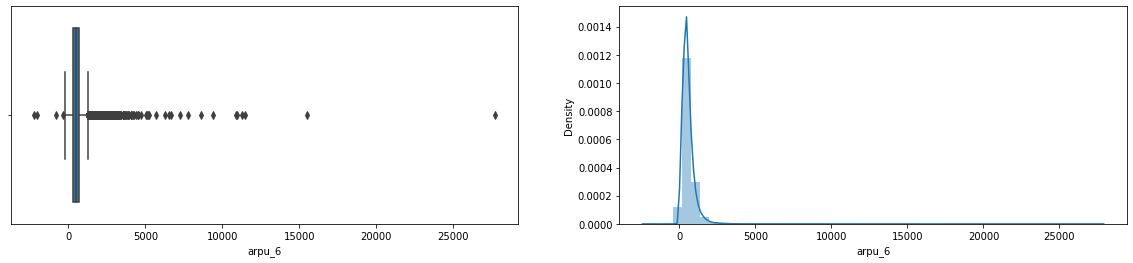

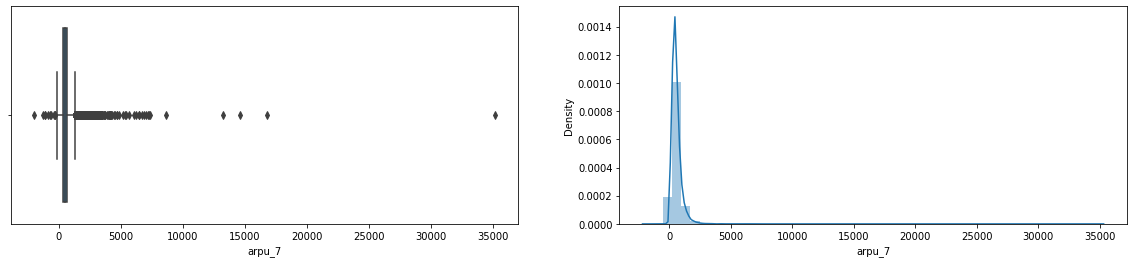

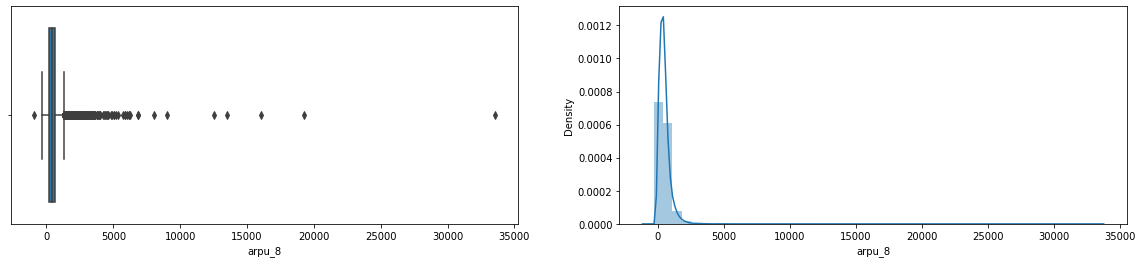

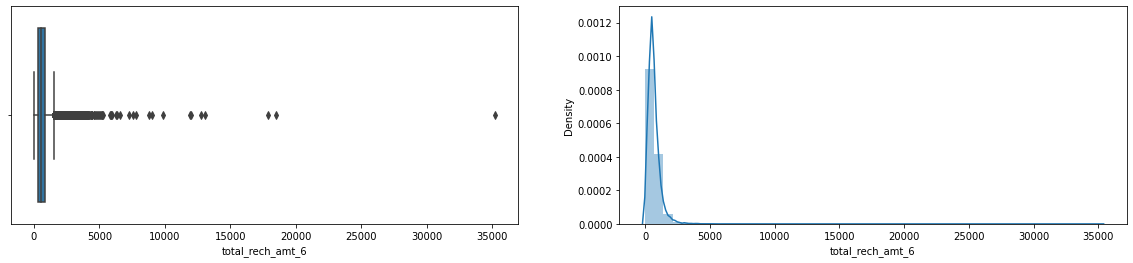

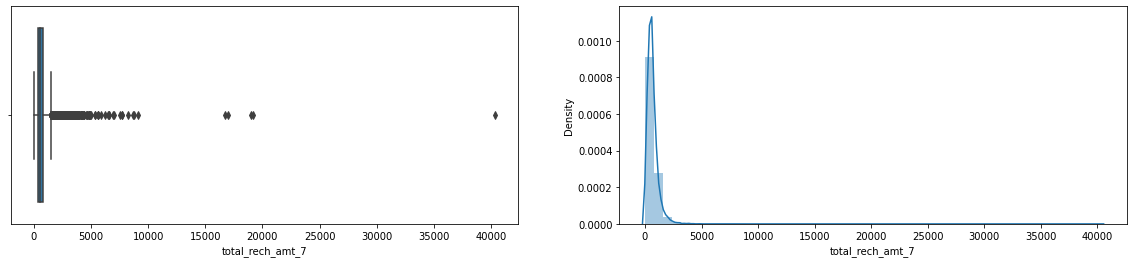

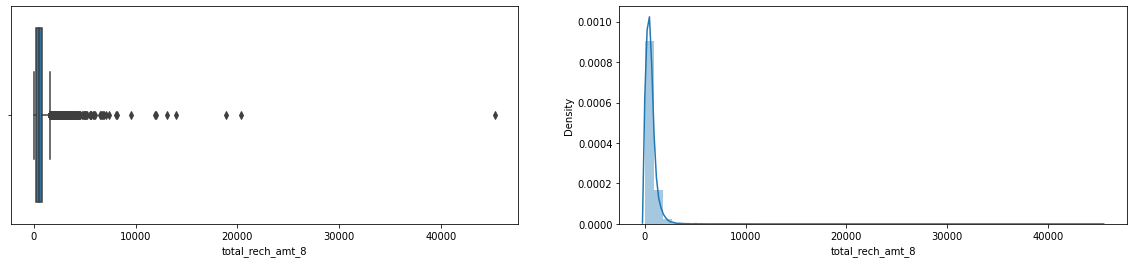

In [457]:
# Lets now see the spread of data for certain variables. 

num_var_univariate = ['arpu_6','arpu_7','arpu_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']

for i in num_var_univariate:
    plt.figure(figsize = [20,4])
    plt.subplot(121)
    sns.boxplot(churn_final[i])
    plt.subplot(122)
    sns.distplot(churn_final[i])
    plt.show()

Observation: <br>
Based on the above univariate graphs, we can see that these variables have highely skewed data. None of the variables taken for the univariate analysis has a normal distribution of data. 

We can clearly see that the **Average revenue per customer** and **total recharge amount** spent by the customer is steadily decreasing when the month is increasing. That is, these two columns have higher values in the 6th month and gradual decline in the 7th and the 8th month. These variable shows a trend that supports the churning of a customer. When we build the model we will learn more about these variables. 

#### Bi Variate Analysis w.r.t target variable. 

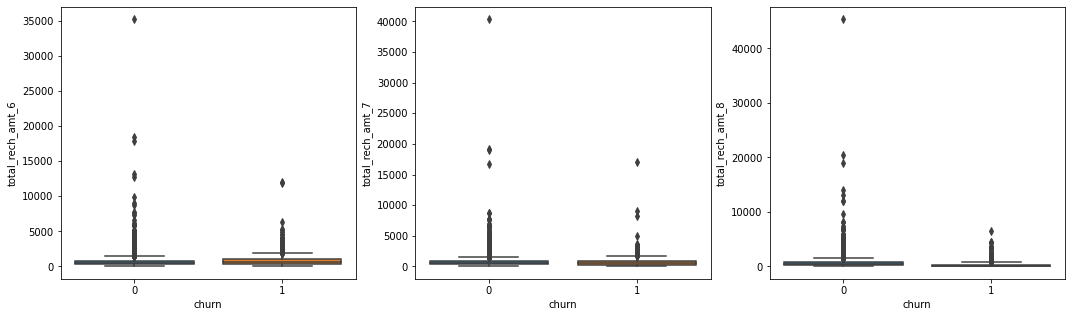

In [458]:
plt.figure(figsize = (18,5))
plt.subplot(1,3,1)
sns.boxplot(y = 'total_rech_amt_6', x = 'churn', data = churn_final)
plt.subplot(1,3,2)
sns.boxplot(y = 'total_rech_amt_7', x = 'churn', data = churn_final)
plt.subplot(1,3,3)
sns.boxplot(y = 'total_rech_amt_8', x = 'churn', data = churn_final)
plt.show()

Observation: <br>
When we see tha bove data, we see a lot of outliers present in the recharge amount columns. We will take care of these outliers in the outliers treatment section. 

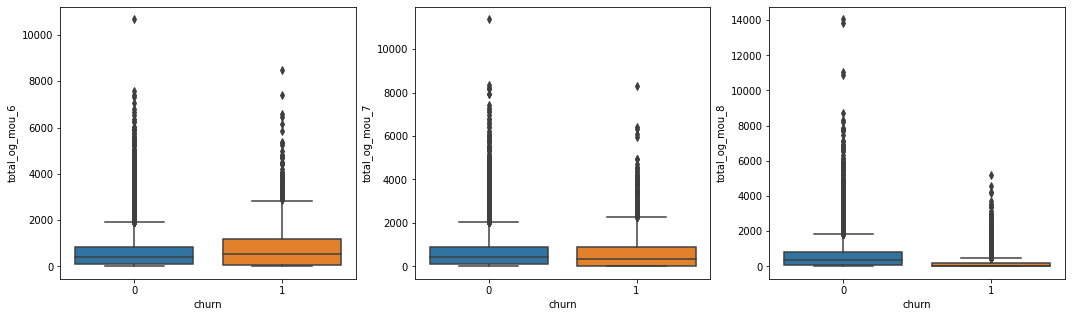

In [459]:
plt.figure(figsize = (18,5))
plt.subplot(1,3,1)
sns.boxplot(y = 'total_og_mou_6', x = 'churn', data = churn_final)
plt.subplot(1,3,2)
sns.boxplot(y = 'total_og_mou_7', x = 'churn', data = churn_final)
plt.subplot(1,3,3)
sns.boxplot(y = 'total_og_mou_8', x = 'churn', data = churn_final)
plt.show()

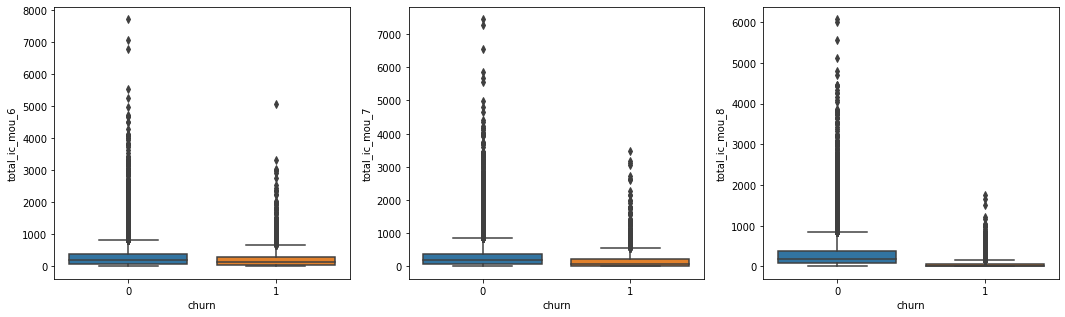

In [460]:
plt.figure(figsize = (18,5))
plt.subplot(1,3,1)
sns.boxplot(y = 'total_ic_mou_6', x = 'churn', data = churn_final)
plt.subplot(1,3,2)
sns.boxplot(y = 'total_ic_mou_7', x = 'churn', data = churn_final)
plt.subplot(1,3,3)
sns.boxplot(y = 'total_ic_mou_8', x = 'churn', data = churn_final)
plt.show()

Lets plot the heatmap and correlation matrix between all the variables. 

In [461]:
churn_final.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 152 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   arpu_6                           float64
 1   arpu_7                           float64
 2   arpu_8                           float64
 3   onnet_mou_6                      float64
 4   onnet_mou_7                      float64
 5   onnet_mou_8                      float64
 6   offnet_mou_6                     float64
 7   offnet_mou_7                     float64
 8   offnet_mou_8                     float64
 9   roam_ic_mou_6                    float64
 10  roam_ic_mou_7                    float64
 11  roam_ic_mou_8                    float64
 12  roam_og_mou_6                    float64
 13  roam_og_mou_7                    float64
 14  roam_og_mou_8                    float64
 15  loc_og_t2t_mou_6                 float64
 16  loc_og_t2t_mou_7                 float64
 17  loc_og_t2t_

In [462]:
heatmap_cols=['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8',
              'loc_og_mou_6' ,'loc_og_mou_7' ,'loc_og_mou_8',
              'std_og_mou_6' ,'std_og_mou_7' ,'std_og_mou_8',
              'isd_og_mou_6' ,'isd_og_mou_7' ,'isd_og_mou_8',
              'spl_og_mou_6' ,'spl_og_mou_7' ,'spl_og_mou_8',
              'og_others_6'  ,'og_others_7'  ,'og_others_8',
              'total_og_mou_6','total_og_mou_7','total_og_mou_8',
              'loc_ic_mou_6' ,'loc_ic_mou_7' ,'loc_ic_mou_8',
              'std_ic_mou_6' ,'std_ic_mou_7' ,'std_ic_mou_8',
              'spl_ic_mou_6' ,'spl_ic_mou_7' ,'spl_ic_mou_8',
              'isd_ic_mou_6' ,'isd_ic_mou_7' ,'isd_ic_mou_8',
              'ic_others_6'  ,'ic_others_7','ic_others_8',
              'total_ic_mou_6'    ,'total_ic_mou_7'    ,'total_ic_mou_8',
              'total_rech_amt_6'  ,'total_rech_amt_7'  ,'total_rech_amt_8',
              'total_rech_data_6' ,'total_rech_data_7' ,'total_rech_data_8',
              'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8',
              'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8',
              'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
              'arpu_diff',
              'churn']

corr = churn_final.corr()
corr

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_amt_call_plus_data_6,total_rech_amt_call_plus_data_7,total_rech_amt_call_plus_data_8,churn
arpu_6,1.000000,0.671732,0.612617,0.341782,0.216219,0.187305,0.508114,0.339951,0.287079,0.126884,0.083484,0.090363,0.196086,0.143261,0.124994,0.166776,0.127681,0.123995,0.330788,0.245394,0.219607,0.139434,0.114368,0.104302,0.047680,0.010017,0.011393,0.327499,0.246516,0.224799,0.274093,0.161528,0.133795,0.301481,0.181419,0.139826,0.066751,0.053564,0.043895,NaN,NaN,NaN,0.385695,0.230406,0.182159,0.466898,0.420753,0.413504,0.122743,0.068491,0.044582,0.054782,0.024347,0.015490,0.554510,0.363276,0.301856,0.081747,0.062923,0.063284,0.185927,0.149405,0.125890,0.051283,0.039198,0.037451,0.178888,0.142728,0.126146,0.088103,0.061598,0.056880,0.098536,0.065705,0.062957,0.034451,0.032583,0.022957,NaN,NaN,NaN,0.124639,0.085674,0.079524,0.225987,0.169024,0.150749,0.031356,-0.034186,-0.011741,0.103090,0.063193,0.070653,0.016183,0.023868,0.012284,0.349709,0.136098,0.119406,0.946125,0.650611,0.603673,0.337983,0.261993,0.284518,0.266656,0.207282,0.199304,0.072714,-0.021877,0.025203,-0.165470,-0.208538,-0.161828,0.090485,0.020223,0.035060,-0.062580,-0.098980,-0.077949,0.152507,0.070184,0.084675,0.014224,-0.004902,0.009762,-0.039073,-0.084189,-0.061430,-0.158359,-0.193927,-0.152069,0.176436,0.081091,0.103661,-0.002555,-0.025233,-0.017509,-0.120360,-0.197733,-0.140312,0.041451,0.058547,0.055172,0.112462,0.089005,-0.023731,0.003324,0.419558,0.210705,0.207462,0.067624
arpu_7,0.671732,1.000000,0.759858,0.211488,0.320178,0.269405,0.351848,0.488950,0.393983,0.092501,0.093692,0.093961,0.133520,0.179894,0.152217,0.106519,0.157367,0.134499,0.215226,0.301642,0.253859,0.112066,0.140968,0.121890,0.009198,0.040485,0.032706,0.213265,0.302955,0.253670,0.166621,0.260775,0.219911,0.203718,0.307701,0.238948,0.051743,0.070678,0.05382

In [463]:
# top 25 high corelation values 
corr2 = corr.abs().unstack()
corr2[corr2 < 1].sort_values(ascending= False).drop_duplicates().head(25)

sachet_2g_8                      count_rech_2g_8                    0.987161
sachet_2g_7                      count_rech_2g_7                    0.986408
count_rech_2g_6                  sachet_2g_6                        0.984924
arpu_8                           total_rech_amt_8                   0.955351
total_rech_amt_6                 arpu_6                             0.946125
total_rech_amt_7                 arpu_7                             0.943588
isd_og_mou_7                     isd_og_mou_8                       0.943120
total_rech_amt_call_plus_data_8  total_data_rech_amt_8              0.941854
total_data_rech_amt_7            total_rech_amt_call_plus_data_7    0.934656
total_rech_amt_call_plus_data_6  total_data_rech_amt_6              0.934058
isd_og_mou_8                     isd_og_mou_6                       0.918187
isd_og_mou_7                     isd_og_mou_6                       0.915247
loc_ic_mou_6                     total_ic_mou_6                     0.895069

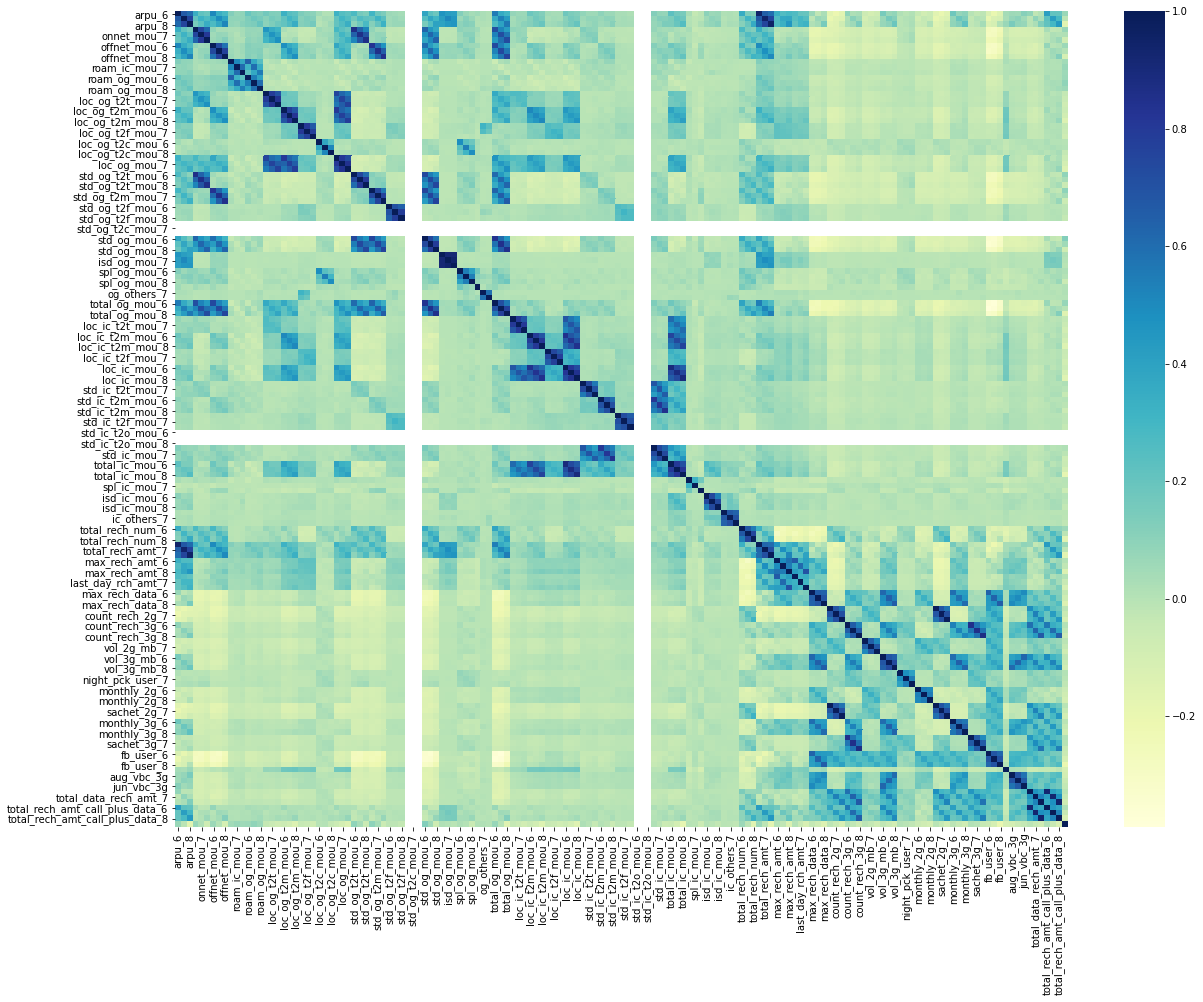

In [464]:
# figure size
plt.figure(figsize=(20,15))

sns.heatmap(corr,cmap="YlGnBu")
plt.show()

Lets now see how the outgoing columns are performing with respect to our target variable. 

### 5.3 Outlier treatment.

When we did the data analysis at the previous section, we saw that there were a lot of outliers in the numerical variables. Before any model is built, it is necessary to treat the outliers as they tend to add bias to the model and affect the performance. 

There are number of ways to treat an outliers like replacing the outlier with mean/median, calculating the IQR(Inter Quartile range) and capping the outliers at the acceptable quantilesplus the IQR value. 

In this case study we will use the 3-sigma technique for treating the outliers. In a normal distribution, it is a thumb rule that 68% of values are within the 1-sigma range, 95% of value is within the 2 sigma range and 99.7% of values gets captured within the 3sigma range. So we will use this logic of 3 sigma range to treat the outliers in our case study.

In [465]:
# All the numerical variables are stored in the num_var variable. Lets first drop the 'churn' target variable from the num_var.

num_var.remove('churn')

In [466]:
# creating a function for calculating the mean+/- 3*sigma value of all the column values, so that the outlier can be set with a 
# lower limit and upper limit. 

def fixoutliers(inp_arr, k=3):
    upper_limit = inp_arr.mean() + k*inp_arr.std()
    lower_limit = inp_arr.mean() - k*inp_arr.std()
    #inp_arr[inp_arr<lower_limit] = lower_limit
    inp_arr[inp_arr>upper_limit] = upper_limit
    return inp_arr

In [467]:
churn_final[num_var] = churn_final[num_var].apply(fixoutliers, axis=0)

Now lets look into certain variables to check whether the outliers has been taken care. 

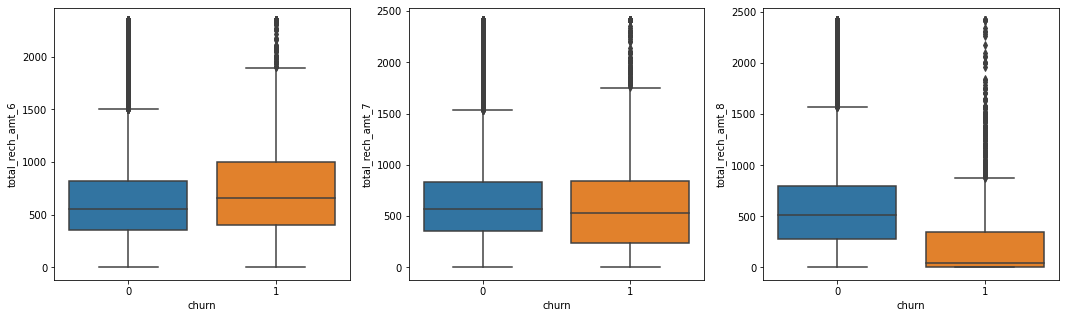

In [468]:
plt.figure(figsize = (18,5))
plt.subplot(1,3,1)
sns.boxplot(y = 'total_rech_amt_6', x = 'churn', data = churn_final)
plt.subplot(1,3,2)
sns.boxplot(y = 'total_rech_amt_7', x = 'churn', data = churn_final)
plt.subplot(1,3,3)
sns.boxplot(y = 'total_rech_amt_8', x = 'churn', data = churn_final)
plt.show()

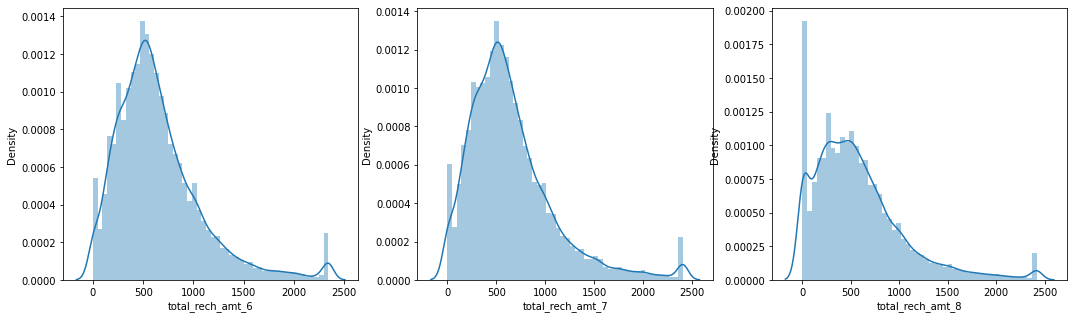

In [469]:
plt.figure(figsize = (18,5))
plt.subplot(1,3,1)
sns.distplot(churn_final['total_rech_amt_6'])
plt.subplot(1,3,2)
sns.distplot(churn_final['total_rech_amt_7'])
plt.subplot(1,3,3)
sns.distplot(churn_final['total_rech_amt_8'])
plt.show()

We can now see the difference in the box plot before and after the outliers are taken care. When we now see the plots, we can clearly see that in the 8th month i.e the action phase, there is a sharp decline in the total_recharge_amount in the churned customers(churn=1) when compared to the previous months. This is a indication that these customers are predicted tobe churned eventually. 

Lets see the box plot (data distribution) of the outgoing variables.

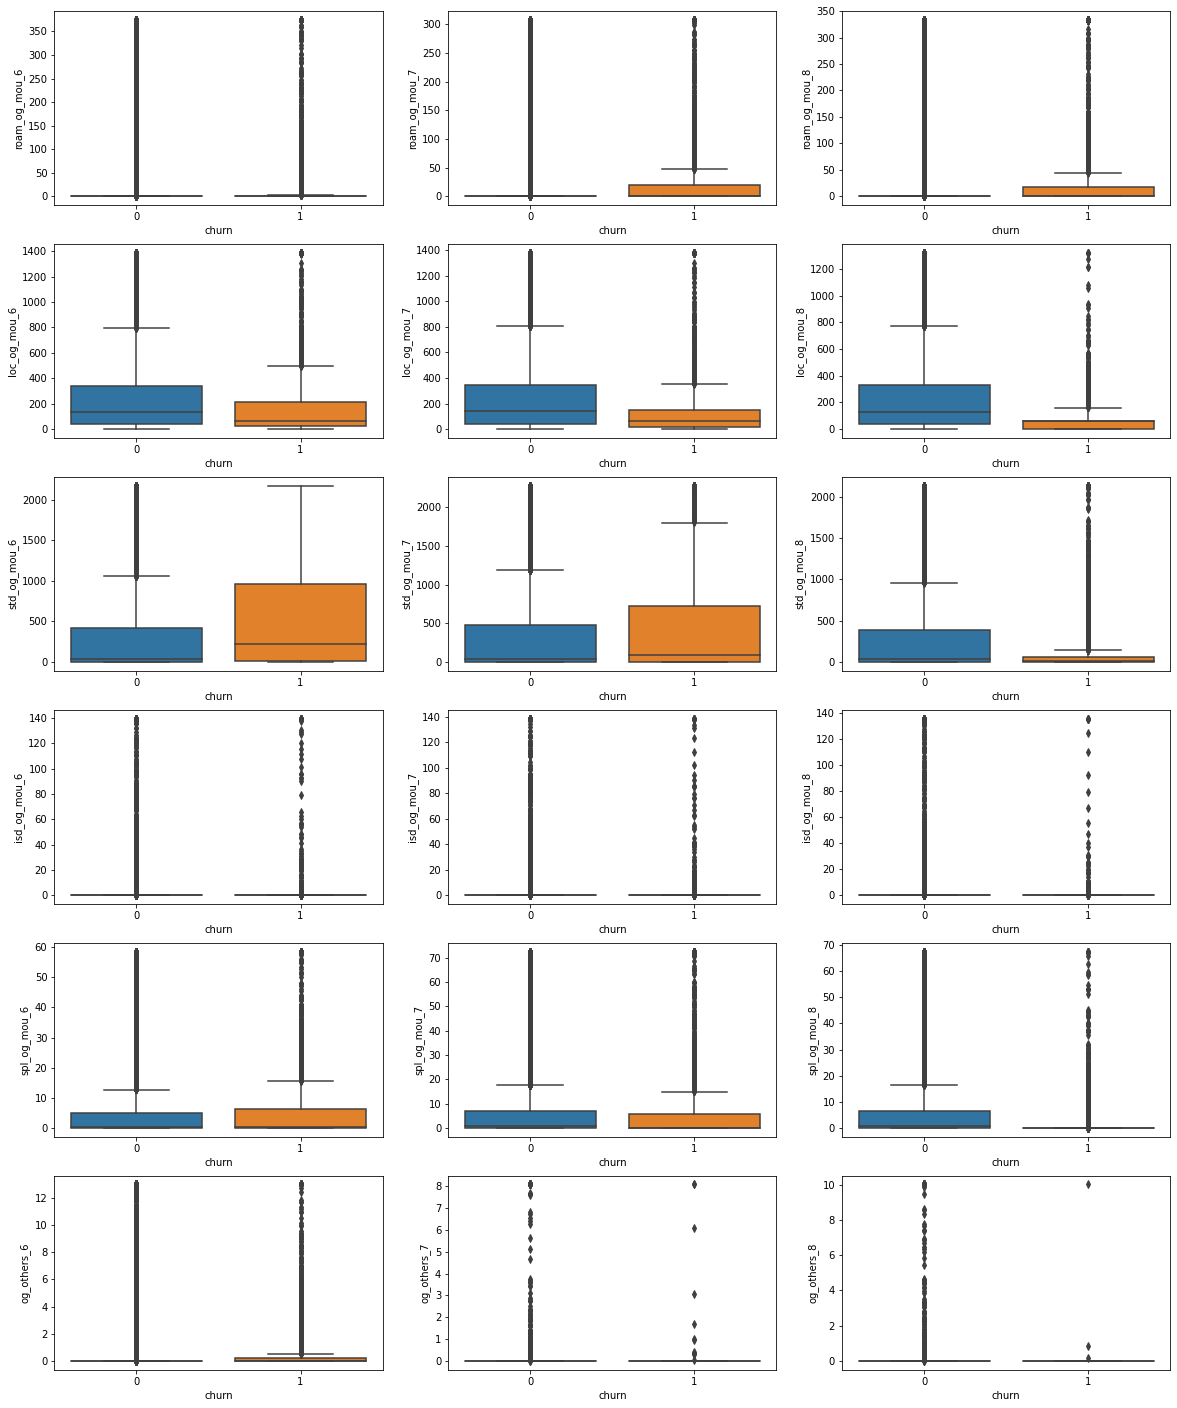

In [470]:
plt.figure(figsize = (20,25))
plt.subplot(6,3,1)
sns.boxplot(y = 'roam_og_mou_6', x = 'churn', data = churn_final)
plt.subplot(6,3,2)
sns.boxplot(y = 'roam_og_mou_7', x = 'churn', data = churn_final)
plt.subplot(6,3,3)
sns.boxplot(y = 'roam_og_mou_8', x = 'churn', data = churn_final)
plt.subplot(6,3,4)
sns.boxplot(y = 'loc_og_mou_6', x = 'churn', data = churn_final)
plt.subplot(6,3,5)
sns.boxplot(y = 'loc_og_mou_7', x = 'churn', data = churn_final)
plt.subplot(6,3,6)
sns.boxplot(y = 'loc_og_mou_8', x = 'churn', data = churn_final)
plt.subplot(6,3,7)
sns.boxplot(y = 'std_og_mou_6', x = 'churn', data = churn_final)
plt.subplot(6,3,8)
sns.boxplot(y = 'std_og_mou_7', x = 'churn', data = churn_final)
plt.subplot(6,3,9)
sns.boxplot(y = 'std_og_mou_8', x = 'churn', data = churn_final)
plt.subplot(6,3,10)
sns.boxplot(y = 'isd_og_mou_6', x = 'churn', data = churn_final)
plt.subplot(6,3,11)
sns.boxplot(y = 'isd_og_mou_7', x = 'churn', data = churn_final)
plt.subplot(6,3,12)
sns.boxplot(y = 'isd_og_mou_8', x = 'churn', data = churn_final)
plt.subplot(6,3,13)
sns.boxplot(y = 'spl_og_mou_6', x = 'churn', data = churn_final)
plt.subplot(6,3,14)
sns.boxplot(y = 'spl_og_mou_7', x = 'churn', data = churn_final)
plt.subplot(6,3,15)
sns.boxplot(y = 'spl_og_mou_8', x = 'churn', data = churn_final)
plt.subplot(6,3,16)
sns.boxplot(y = 'og_others_6', x = 'churn', data = churn_final)
plt.subplot(6,3,17)
sns.boxplot(y = 'og_others_7', x = 'churn', data = churn_final)
plt.subplot(6,3,18)
sns.boxplot(y = 'og_others_8', x = 'churn', data = churn_final)
plt.show()

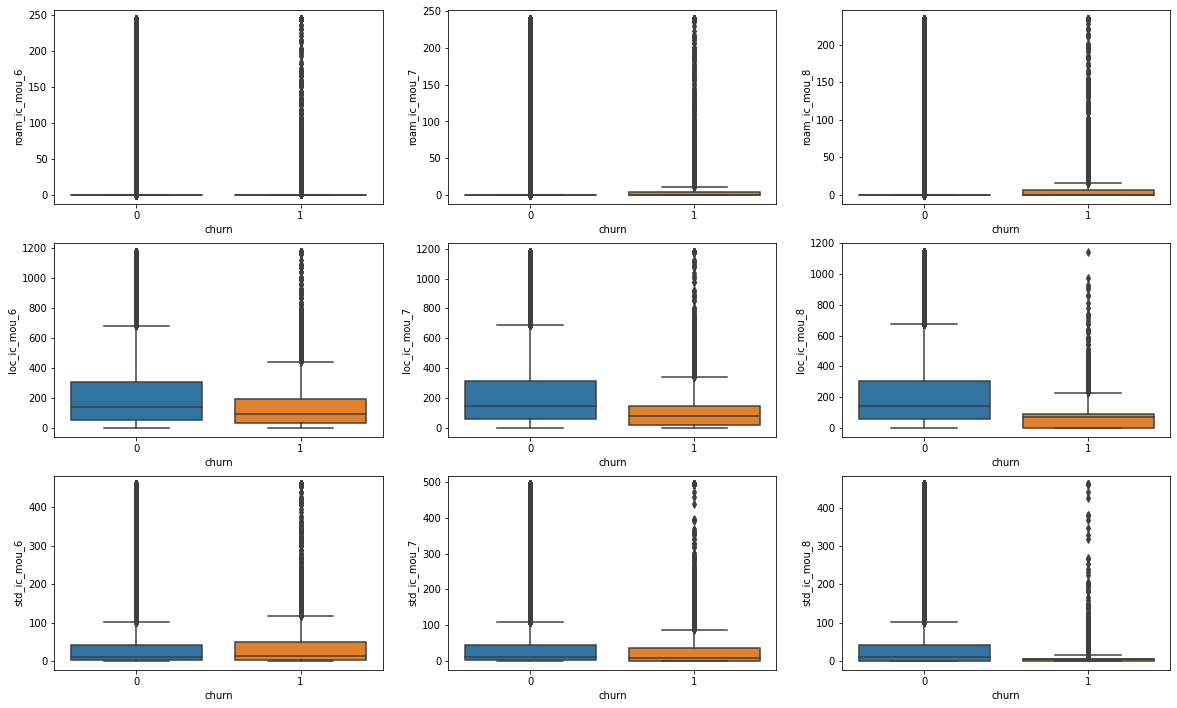

In [471]:
plt.figure(figsize = (20,25))
plt.subplot(6,3,1)
sns.boxplot(y = 'roam_ic_mou_6', x = 'churn', data = churn_final)
plt.subplot(6,3,2)
sns.boxplot(y = 'roam_ic_mou_7', x = 'churn', data = churn_final)
plt.subplot(6,3,3)
sns.boxplot(y = 'roam_ic_mou_8', x = 'churn', data = churn_final)
plt.subplot(6,3,4)
sns.boxplot(y = 'loc_ic_mou_6', x = 'churn', data = churn_final)
plt.subplot(6,3,5)
sns.boxplot(y = 'loc_ic_mou_7', x = 'churn', data = churn_final)
plt.subplot(6,3,6)
sns.boxplot(y = 'loc_ic_mou_8', x = 'churn', data = churn_final)
plt.subplot(6,3,7)
sns.boxplot(y = 'std_ic_mou_6', x = 'churn', data = churn_final)
plt.subplot(6,3,8)
sns.boxplot(y = 'std_ic_mou_7', x = 'churn', data = churn_final)
plt.subplot(6,3,9)
sns.boxplot(y = 'std_ic_mou_8', x = 'churn', data = churn_final)
plt.show()


### 5.5 Train-Test Split:

In [472]:
#Importing the necessary libraries. 

from sklearn.model_selection import train_test_split

In [473]:
# Splitting the train and test dataset. 

X = churn_final.drop('churn',axis=1)
y = churn_final.churn

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=100, stratify=y)

In [474]:
# Shapes of train and test datasets. 

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22500, 151)
(22500,)
(7501, 151)
(7501,)


### 5.6 Scaling the data.

Before building the model, it is necessary to bring all the numerical columns to the same scale. We will do standard scalar as part of this case study where we will bring all numerical variables to mean 0 and standard deviation sorrounding the mean. 

In [475]:
# importing necessary libraries. 

from sklearn.preprocessing import StandardScaler

# creating the instance of the object. 

scaler = StandardScaler()

In [476]:
# getting the numerical columns from the X_train.
cat_vars = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8','fb_user_6', 'fb_user_7', 'fb_user_8']

num_vars = [x for x in X_train.columns  if x not in cat_vars]

# Scaling the train and test datasets. 

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

X_train.head(5)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_amt_call_plus_data_6,total_rech_amt_call_plus_data_7,total_rech_amt_call_plus_data_8
23321,0.428964,0.939460,0.764757,0.116339,-0.304940,-0.319532,0.469318,1.086112,1.478648,0.498747,0.091997,0.174346,0.193530,0.030400,0.042175,1.434255,0.373281,0.251416,1.351269,2.664856,3.548531,-0.132795,1.145186,-0.380174,-0.355193,-0.346815,-0.352149,1.498016,1.941585,2.401864,-0.405205,-0.454671,-0.433466,-0.232847,-0.241876,-0.313254,-0.243154,-0.001820,0.223137,0.0,0.0,0.0,-0.415813,-0.450453,-0.468573,-0.121117,-0.120303,-0.110559,-0.487496,0.013281,0.020310,-0.357515,-0.048147,-0.050097,0.343038,0.500368,0.741397,3.567904,0.851425,0.020047,1.281249,3.973631,3.138091,0.051387,-0.013405,0.505453,2.193120,3.141922,2.160588,0.214223,-0.002148,-0.219205,-0.163234,0.121262,0.490844,0.166849,0.411562,0.968014,0.0,0.0,0.0,-0.029586,0.099191,0.321818,1.814110,2.598247,1.837130,0.152553,-0.220290,-0.277695,-0.247638,-0.256731,-0.255182,2.091138,1.107874,0.354281,0.052555,0.067021,0.404635,0.380979,0.889312,0.804385,0.683819,0.646922,0.743861,0.314450,1.497714,1.554783,1.786187,1.754130,1.868604,-0.553585,-0.133511,-0.535136,0.772856,0.683778,0.769020,-0.398263,-0.337200,-0.383942,0.423864,0.489946,0.819662,0.0,0.0,0.0,-0.421821,2.054011,-0.398662,-0.470726,-0.484498,-0.464128,1.615893,1.508852,1.632102,-0.303312,-0.293927,-0.267270,1.0,1.0,1.0,0.071592,0.780858,0.715334,0.389609,-0.190079,0.376606,-0.172294,-0.000290,0.701079,0.190842
13018,-1.466121,-0.865874,-1.011153,-0.657120,-0.646313,-0.613204,-0.890878,-0.881113,-0.841142,-0.287870,-0.257600,-0.261425,-0.307839,-0.285192,-0.278263,-0.552020,-0.547314,-0.542077,-0.780117,-0.792557,-0.768373,-0.427657,-0.433506,-0.430903,-0.355193,-0.346815,-0.352149,-0.803113,-0.813500,-0.786811,-0.472355,-0.473456,-0.440014,-0.517495,-0.515212,-0.481274,-0.2431

In [477]:
# Taking a copy of the X_train, y_train, X_test and y_test.

X_train_main = X_train.copy()
y_train_main = y_train.copy()
X_test_main = X_test.copy()
y_test_main = y_test.copy()

## Step 6: Model Building and Evaluation.

### 6.1 Model 1: Good Interpretable Model: Logistic Regression without PCA.

As a first part of the model building process, we will build a model with basic logistic regression. In this model we will use RFE feature (Recursive feature elimination) method to get 30 important features that contribute to the churning of a customer and then we will apply the ViF (Variation inflation factor) to get the final set of features that define the churning. 

This model is a good interpretable model as we will just be using logistic regression with no PCA. 

In [478]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
import statsmodels.api as sm



In [479]:
churn_final['churn'].value_counts()

0    27560
1    2441 
Name: churn, dtype: int64

Using RFE to select top 25 columns

In [480]:
logreg = LogisticRegression(class_weight = "balanced")

rfe = RFE(logreg, 25)    
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))
col = X_train.columns[rfe.support_]
col

Index(['onnet_mou_7', 'offnet_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'isd_ic_mou_8', 'last_day_rch_amt_8', 'count_rech_2g_8',
       'night_pck_user_6', 'fb_user_8', 'total_data_rech_amt_6',
       'total_rech_amt_call_plus_data_6'],
      dtype='object')

#### Assessing model with Stats model. 

In [481]:
X_train_sm = sm.add_constant(X_train[col])

logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                22500
Model:                            GLM   Df Residuals:                    22474
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3948.0
Date:                Mon, 30 Nov 2020   Deviance:                       7896.0
Time:                        16:09:27   Pearson chi2:                 3.23e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
9,std_og_mou_8,75.19
5,loc_og_mou_8,59.04
15,loc_ic_mou_8,54.97
10,total_og_mou_8,41.96
17,total_ic_mou_8,25.03
4,loc_og_t2m_mou_8,20.99
13,loc_ic_t2m_mou_8,20.34
7,std_og_t2t_mou_8,17.97
8,std_og_t2m_mou_8,16.14
6,std_og_t2t_mou_7,12.87


night_pck_user_6Lets drop the column 'total_ic_mou_6' as it has a very high p value. 

In [482]:
col = col.drop('night_pck_user_6',1)

In [483]:

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                22500
Model:                            GLM   Df Residuals:                    22475
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3949.3
Date:                Mon, 30 Nov 2020   Deviance:                       7898.7
Time:                        16:11:21   Pearson chi2:                 3.14e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
9,std_og_mou_8,75.18
5,loc_og_mou_8,59.04
15,loc_ic_mou_8,54.97
10,total_og_mou_8,41.95
17,total_ic_mou_8,25.03
4,loc_og_t2m_mou_8,20.99
13,loc_ic_t2m_mou_8,20.34
7,std_og_t2t_mou_8,17.96
8,std_og_t2m_mou_8,16.14
6,std_og_t2t_mou_7,12.87


Lets remove the column 'night_pck_user_8' as it has a high p value. 

In [484]:
col = col.drop('std_og_mou_8', 1)
len(col)

23

In [485]:


X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                22500
Model:                            GLM   Df Residuals:                    22476
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3963.4
Date:                Mon, 30 Nov 2020   Deviance:                       7926.8
Time:                        16:12:33   Pearson chi2:                 3.20e+11
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
14,loc_ic_mou_8,54.94
5,loc_og_mou_8,47.42
16,total_ic_mou_8,24.98
4,loc_og_t2m_mou_8,20.45
12,loc_ic_t2m_mou_8,20.34
9,total_og_mou_8,19.49
6,std_og_t2t_mou_7,12.81
1,onnet_mou_7,12.00
3,loc_og_t2t_mou_8,11.46
7,std_og_t2t_mou_8,9.28


Dropping the column 'og_others_8' as ithas high p - value.

In [486]:
col = col.drop('loc_og_mou_8',1)
len(col)

22

In [487]:


X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                22500
Model:                            GLM   Df Residuals:                    22477
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3963.8
Date:                Mon, 30 Nov 2020   Deviance:                       7927.6
Time:                        16:13:12   Pearson chi2:                 3.65e+11
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
13,loc_ic_mou_8,54.40
15,total_ic_mou_8,24.95
11,loc_ic_t2m_mou_8,20.14
8,total_og_mou_8,15.36
5,std_og_t2t_mou_7,12.68
1,onnet_mou_7,11.85
6,std_og_t2t_mou_8,7.98
9,loc_ic_t2t_mou_8,7.46
7,std_og_t2m_mou_8,6.20
21,total_data_rech_amt_6,6.18


Dropping the column 'total_ic_mou_8' as it has high VIF. 

In [488]:
col = col.drop('total_og_mou_8',1)
len(col)

21

In [489]:


X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
print(res.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                22500
Model:                            GLM   Df Residuals:                    22478
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3965.5
Date:                Mon, 30 Nov 2020   Deviance:                       7931.1
Time:                        16:13:48   Pearson chi2:                 4.65e+11
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
12,loc_ic_mou_8,54.38
14,total_ic_mou_8,24.91
10,loc_ic_t2m_mou_8,20.12
5,std_og_t2t_mou_7,12.25
1,onnet_mou_7,11.31
8,loc_ic_t2t_mou_8,7.41
20,total_data_rech_amt_6,6.17
21,total_rech_amt_call_plus_data_6,5.43
13,std_ic_mou_8,3.75
9,loc_ic_t2m_mou_7,3.68


Dropping the feature 'ic_others_8' as it has high p value. 

In [490]:
col = col.drop('loc_ic_mou_8',1)
len(col)

20

In [491]:


X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
print(res.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                22500
Model:                            GLM   Df Residuals:                    22479
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4023.2
Date:                Mon, 30 Nov 2020   Deviance:                       8046.4
Time:                        16:14:11   Pearson chi2:                 5.31e+12
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
13,total_ic_mou_8,14.72
5,std_og_t2t_mou_7,12.25
1,onnet_mou_7,11.31
10,loc_ic_t2m_mou_8,9.16
19,total_data_rech_amt_6,6.17
20,total_rech_amt_call_plus_data_6,5.42
9,loc_ic_t2m_mou_7,3.68
8,loc_ic_t2t_mou_8,3.57
6,std_og_t2t_mou_8,3.33
3,loc_og_t2t_mou_8,3.28


In [492]:
col = col.drop('total_ic_mou_8',1)
len(col)

19

In [493]:


X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
print(res.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                22500
Model:                            GLM   Df Residuals:                    22480
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4326.4
Date:                Mon, 30 Nov 2020   Deviance:                       8652.7
Time:                        16:14:39   Pearson chi2:                 1.62e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
5,std_og_t2t_mou_7,12.25
1,onnet_mou_7,11.31
18,total_data_rech_amt_6,6.16
19,total_rech_amt_call_plus_data_6,5.42
10,loc_ic_t2m_mou_8,4.25
9,loc_ic_t2m_mou_7,3.67
6,std_og_t2t_mou_8,3.33
3,loc_og_t2t_mou_8,3.27
2,offnet_mou_7,2.94
4,loc_og_t2m_mou_8,2.37


In [494]:
col = col.drop('std_og_t2t_mou_7',1)
len(col)

18

In [495]:

X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
print(res.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                22500
Model:                            GLM   Df Residuals:                    22481
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4333.1
Date:                Mon, 30 Nov 2020   Deviance:                       8666.2
Time:                        16:15:06   Pearson chi2:                 1.62e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
17,total_data_rech_amt_6,6.16
18,total_rech_amt_call_plus_data_6,5.41
9,loc_ic_t2m_mou_8,4.25
8,loc_ic_t2m_mou_7,3.67
1,onnet_mou_7,3.12
2,offnet_mou_7,2.94
5,std_og_t2t_mou_8,2.72
4,loc_og_t2m_mou_8,2.37
0,const,2.37
6,std_og_t2m_mou_8,2.36


In [496]:
col = col.drop('total_data_rech_amt_6',1)
len(col)

17

In [497]:
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
print(res.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                22500
Model:                            GLM   Df Residuals:                    22482
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4360.1
Date:                Mon, 30 Nov 2020   Deviance:                       8720.2
Time:                        16:15:37   Pearson chi2:                 1.61e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
9,loc_ic_t2m_mou_8,4.25
8,loc_ic_t2m_mou_7,3.67
1,onnet_mou_7,3.04
2,offnet_mou_7,2.78
5,std_og_t2t_mou_8,2.72
4,loc_og_t2m_mou_8,2.36
0,const,2.35
6,std_og_t2m_mou_8,2.35
3,loc_og_t2t_mou_8,1.97
7,loc_ic_t2t_mou_8,1.53


In [498]:
col = col.drop('isd_ic_mou_8',1)
len(col)

16

In [499]:
X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
print(res.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                22500
Model:                            GLM   Df Residuals:                    22483
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4361.8
Date:                Mon, 30 Nov 2020   Deviance:                       8723.7
Time:                        16:16:02   Pearson chi2:                 1.63e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
9,loc_ic_t2m_mou_8,4.25
8,loc_ic_t2m_mou_7,3.67
1,onnet_mou_7,3.04
2,offnet_mou_7,2.78
5,std_og_t2t_mou_8,2.72
4,loc_og_t2m_mou_8,2.36
0,const,2.35
6,std_og_t2m_mou_8,2.35
3,loc_og_t2t_mou_8,1.97
7,loc_ic_t2t_mou_8,1.53


In [500]:
col = col.drop('loc_ic_t2m_mou_8',1)
len(col)

15

In [501]:
X_train_sm = sm.add_constant(X_train[col])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
print(res.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                22500
Model:                            GLM   Df Residuals:                    22484
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4379.4
Date:                Mon, 30 Nov 2020   Deviance:                       8758.7
Time:                        16:16:29   Pearson chi2:                 1.41e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
1,onnet_mou_7,3.03
5,std_og_t2t_mou_8,2.72
2,offnet_mou_7,2.68
0,const,2.35
6,std_og_t2m_mou_8,2.31
4,loc_og_t2m_mou_8,2.02
3,loc_og_t2t_mou_8,1.97
8,loc_ic_t2m_mou_7,1.67
7,loc_ic_t2t_mou_8,1.51
14,fb_user_8,1.46


In [502]:
col = col.drop('loc_ic_t2m_mou_7',1)
len(col)

14

In [503]:
X_train_sm = sm.add_constant(X_train[col])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
print(res.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                22500
Model:                            GLM   Df Residuals:                    22485
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4379.5
Date:                Mon, 30 Nov 2020   Deviance:                       8759.1
Time:                        16:16:59   Pearson chi2:                 1.39e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
1,onnet_mou_7,3.03
5,std_og_t2t_mou_8,2.71
2,offnet_mou_7,2.61
0,const,2.35
6,std_og_t2m_mou_8,2.25
3,loc_og_t2t_mou_8,1.96
4,loc_og_t2m_mou_8,1.76
13,fb_user_8,1.46
7,loc_ic_t2t_mou_8,1.44
12,count_rech_2g_8,1.35


In [504]:
col = col.drop('onnet_mou_7',1)
len(col)

13

In [505]:
X_train_sm = sm.add_constant(X_train[col])
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logml_final = logm12.fit()
print(res.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                22500
Model:                            GLM   Df Residuals:                    22485
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4379.5
Date:                Mon, 30 Nov 2020   Deviance:                       8759.1
Time:                        16:17:38   Pearson chi2:                 1.39e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
1,offnet_mou_7,2.57
0,const,2.33
5,std_og_t2m_mou_8,2.21
3,loc_og_t2m_mou_8,1.71
2,loc_og_t2t_mou_8,1.50
12,fb_user_8,1.45
6,loc_ic_t2t_mou_8,1.44
11,count_rech_2g_8,1.35
10,last_day_rch_amt_8,1.15
7,loc_ic_t2f_mou_8,1.13


In [604]:
top_13_features = ['spl_ic_mou_8','total_rech_amt_call_plus_data_6','std_ic_mou_8','std_og_t2t_mou_8','loc_ic_t2f_mou_8',
                'last_day_rch_amt_8','count_rech_2g_8','loc_ic_t2t_mou_8','fb_user_8','loc_og_t2t_mou_8','loc_og_t2m_mou_8',
                'std_og_t2m_mou_8','offnet_mou_7']

Observation:
- Now p -value of all features are less than 0.05 and vif is also less than 3.
- These 13 features has the most significance in predicting the target churn variable of a customer. Lets build the model with these features. 


In [506]:
y_train_pred = logml_final.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([1.81871298e-04, 1.54010575e-03, 2.48402182e-01, 2.29798722e-02,
       9.87618432e-02, 2.42380982e-01, 1.76309764e-03, 3.71139815e-01,
       5.18482264e-03, 9.81187170e-03])

#### Creating a dataframe with actual churn flag and the predicted probabilities. 

In [507]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.000182,23321
1,0,0.001540,13018
2,0,0.248402,17961
3,0,0.022980,554
4,0,0.098762,3867


#### Finding the optimal cut off

In [508]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000182,23321,1,0,0,0,0,0,0,0,0,0
1,0,0.001540,13018,1,0,0,0,0,0,0,0,0,0
2,0,0.248402,17961,1,1,1,0,0,0,0,0,0,0
3,0,0.022980,554,1,0,0,0,0,0,0,0,0,0
4,0,0.098762,3867,1,0,0,0,0,0,0,0,0,0


In [509]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0  0.0   0.081378  1.000000  0.000000
0.1  0.1   0.828133  0.783179  0.832116
0.2  0.2   0.894178  0.696341  0.911704
0.3  0.3   0.918889  0.604588  0.946732
0.4  0.4   0.922133  0.323321  0.975180
0.5  0.5   0.921867  0.136537  0.991436
0.6  0.6   0.920533  0.061715  0.996613
0.7  0.7   0.919867  0.025669  0.999081
0.8  0.8   0.918711  0.004915  0.999661
0.9  0.9   0.918622  0.000546  0.999952


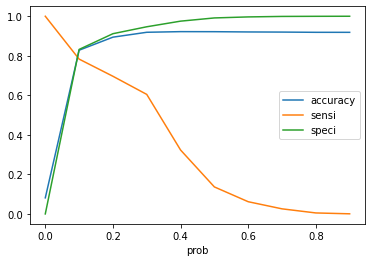

In [510]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The optimal cut off looks like 0.15

In [511]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.15 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000182,23321,1,0,0,0,0,0,0,0,0,0,0
1,0,0.001540,13018,1,0,0,0,0,0,0,0,0,0,0
2,0,0.248402,17961,1,1,1,0,0,0,0,0,0,0,1
3,0,0.022980,554,1,0,0,0,0,0,0,0,0,0,0
4,0,0.098762,3867,1,0,0,0,0,0,0,0,0,0,0


In [512]:
# Let's check the overall accuracy.
metrics.recall_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7351174221736756

In [514]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [516]:

print('******************FOR TRAIN SET AFTER OPTIMAL CUT OFF**********************')
print("True Positives (TP) - These are customers in which we predicted will churn and Customers actually Churned:",TP)
print("True Negatives (TN) - We predicted no(customers will not churn) and they don’t churn:",TN)
print("False Positives (FP) - We predicted yes they will Churn, but they don’t churn;Also known as a Type I error:",FP)
print("False Negatives (FN) - We predicted they will not churn, but they actually churned; Also known as a Type II error:",FN)
Accuracy=round(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted),2)
print("Accuracy of the model is:", Accuracy)

## Let's calculate Sensistivity. 
Sensitivity=round(TP / float(TP+FN),2)
print("Sensistivity - When it’s actually Churned, how often does it predict Churned: ",Sensitivity)

## Specificity
Specificity=round(TN / float(TN+FP),2)
print("Specificity - When it’s actually not churned, how often does it predict not churned??: ", Specificity)

# Calculate false postive rate
FPR=round(FP/ float(TN+FP),2)
print("False postive rate - predicting Churned when customer does not have Churned:",FPR)

******************FOR TRAIN SET AFTER OPTIMAL CUT OFF**********************
True Positives (TP) - These are customers in which we predicted will churn and Customers actually Churned: 1346
True Negatives (TN) - We predicted no(customers will not churn) and they don’t churn: 18275
False Positives (FP) - We predicted yes they will Churn, but they don’t churn;Also known as a Type I error: 2394
False Negatives (FN) - We predicted they will not churn, but they actually churned; Also known as a Type II error: 485
Accuracy of the model is: 0.87
Sensistivity - When it’s actually Churned, how often does it predict Churned:  0.74
Specificity - When it’s actually not churned, how often does it predict not churned??:  0.88
False postive rate - predicting Churned when customer does not have Churned: 0.12


#### ROC of Train set.

In [517]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [518]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.final_predicted, drop_intermediate = False )

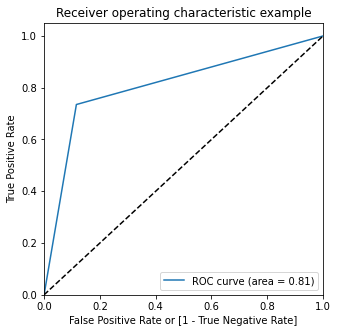

In [519]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

#### Prediction on test set.

In [520]:
X_test = X_test[col]

X_test_sm = sm.add_constant(X_test[col])


In [522]:
y_test_pred = logml_final.predict(X_test_sm)
y_test_pred[:10]

29494    0.524615
6237     0.248859
12590    0.015617
10942    0.012762
4167     0.031246
2437     0.015093
20865    0.060093
5449     0.046347
8957     0.383936
3230     0.018740
dtype: float64

In [523]:
# Converting y_test_pred to a dataframe

y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
29494,0.524615
6237,0.248859
12590,0.015617
10942,0.012762
4167,0.031246


In [525]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [526]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [527]:
# Remove index for both dataframes to append them side by side 

y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [528]:
# Append y_test_df and y_test_pred

y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)

In [529]:
# Check 'y_pred_final'

y_pred_final.head()

,churn,CustID,0
0,1,29494,0.524615
1,0,6237,0.248859
2,0,12590,0.015617
3,0,10942,0.012762
4,0,4167,0.031246


In [530]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [531]:
# Let's see the head of y_pred_final

y_pred_final.head()

,churn,CustID,Conversion_Prob
0,1,29494,0.524615
1,0,6237,0.248859
2,0,12590,0.015617
3,0,10942,0.012762
4,0,4167,0.031246


In [532]:
# Make predictions on the test set using 0.15 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.15 else 0)
y_pred_final.head()

,churn,CustID,Conversion_Prob,final_predicted
0,1,29494,0.524615,1
1,0,6237,0.248859,1
2,0,12590,0.015617,0
3,0,10942,0.012762,0
4,0,4167,0.031246,0


In [533]:
# Let's check the recall

metrics.recall_score(y_pred_final['churn'], y_pred_final.final_predicted)

0.719672131147541

In [534]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [535]:

print('******************FOR TEST SET**********************')
print("True Positives (TP) - These are customers in which we predicted will churn and Customers actually Churned:",TP)
print("True Negatives (TN) - We predicted no(customers will not churn) and they don’t churn:",TN)
print("False Positives (FP) - We predicted yes they will Churn, but they don’t churn;Also known as a Type I error:",FP)
print("False Negatives (FN) - We predicted they will not churn, but they actually churned; Also known as a Type II error:",FN)
Test_Accuracy=round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted),2)
print("Accuracy of the model is:", Test_Accuracy)

## Let's calculate Sensistivity. 
Sensitivity=round(TP / float(TP+FN),2)
print("Sensistivity - When it’s actually Churned, how often does it predict Churned: ",Sensitivity)

## Specificity
Specificity=round(TN / float(TN+FP),2)
print("Specificity - When it’s actually not churned, how often does it predict not churned??: ", Specificity)

# Calculate false postive rate
FPR=round(FP/ float(TN+FP),2)
print("False postive rate - predicting Churned when customer does not have Churned:",FPR)

******************FOR TEST SET**********************
True Positives (TP) - These are customers in which we predicted will churn and Customers actually Churned: 439
True Negatives (TN) - We predicted no(customers will not churn) and they don’t churn: 6043
False Positives (FP) - We predicted yes they will Churn, but they don’t churn;Also known as a Type I error: 848
False Negatives (FN) - We predicted they will not churn, but they actually churned; Also known as a Type II error: 171
Accuracy of the model is: 0.86
Sensistivity - When it’s actually Churned, how often does it predict Churned:  0.72
Specificity - When it’s actually not churned, how often does it predict not churned??:  0.88
False postive rate - predicting Churned when customer does not have Churned: 0.12


#### ROC of Test set.


In [536]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [537]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.churn, y_pred_final.final_predicted, drop_intermediate = False )

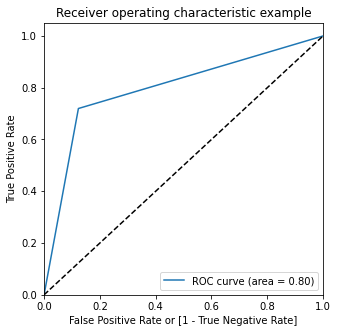

In [538]:
draw_roc(y_pred_final.churn, y_pred_final.final_predicted)

In [546]:
# results.drop(results.columns,axis = 1,inplace = True)
# results.drop(results.index,axis = 0 , inplace = True)
# results

""


In [547]:
pd.set_option('display.max_colwidth', 0)
results = pd.DataFrame({'Model':[1],'Desc':['Good Interpretable Model: Basic Logistic Regression without PCA (class_weight=balanced)'],'Accuracy':[Accuracy],'Sensitivity':[Sensitivity],'Specificity':[Specificity],'FPR':[FPR],'TP':[TP],'TN':[TN],'FP':[FP],'FN':[FN]})
results= results[['Model','Desc','Accuracy','Sensitivity','Specificity','FPR','TP','TN','FP','FN']]
results

,Model,Desc,Accuracy,Sensitivity,Specificity,FPR,TP,TN,FP,FN
0,1,Good Interpretable Model: Basic Logistic Regression without PCA (class_weight=balanced),0.87,0.72,0.88,0.12,439,6043,848,171


### 6.2 handle class imbalance

In [548]:
#Lets first copy the X_train,y_train, X_test and y_test from the main train&test datasets.

X_train = X_train_main.copy()
y_train = y_train_main.copy()
X_test = X_test_main.copy()
y_test = y_test_main.copy()

In [549]:
print(y_train.value_counts(normalize = True))
print(y_train.value_counts())

0    0.918622
1    0.081378
Name: churn, dtype: float64
0    20669
1    1831 
Name: churn, dtype: int64


In [368]:
# from imblearn.over_sampling import SMOTE
# X_smote, y_smote = SMOTE(random_state= 43).fit_resample(X_train, y_train)
# print(pd.Series(y_smote).value_counts(normalize = True))
# print(pd.Series(y_smote).value_counts())

1    0.5
0    0.5
dtype: float64
1    20669
0    20669
dtype: int64


In [550]:
from imblearn.under_sampling import RandomUnderSampler

under = RandomUnderSampler(random_state = 43)
X_under, y_under = under.fit_resample(X_train, y_train)

### Using PCA to create new train data

We will use PCA (Principal Component Analysis) for dimensionality reduction. Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components.

Now, we will perfrom PCA on the data we will use svd_solver as randomized and random_state as 43

In [551]:
#Importing the PCA libraries. 

from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized', random_state = 43)
pca.fit(X_under)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=43,
    svd_solver='randomized', tol=0.0, whiten=False)

In [552]:
#Components from PCA
pca.components_

array([[ 1.52789344e-01,  1.75068099e-01,  1.43584531e-01, ...,
        -1.77890554e-02,  7.96518227e-04,  2.48645077e-02],
       [-1.09860451e-02,  4.04293614e-02,  1.10388776e-01, ...,
         5.21002296e-02,  8.80879652e-02,  1.08214396e-01],
       [ 8.64562214e-02,  1.67748674e-01,  1.56293405e-01, ...,
         1.36199774e-01,  1.86507691e-01,  1.64418714e-01],
       ...,
       [-0.00000000e+00, -2.04368457e-17, -7.40880704e-17, ...,
        -3.05933617e-16,  1.60526023e-16,  5.39236527e-17],
       [ 0.00000000e+00, -6.84676963e-17, -8.31319412e-19, ...,
         3.27602251e-17, -1.80593588e-16,  6.67611355e-17],
       [ 0.00000000e+00,  1.08648361e-17,  1.22481158e-16, ...,
         1.33171309e-16, -3.03859332e-16, -1.72819049e-16]])

In [553]:
#Looking at the explained variance ratio for each component
pca.explained_variance_ratio_

array([1.12421137e-01, 1.00163058e-01, 6.13030593e-02, 5.21211918e-02,
       4.05375594e-02, 3.92994366e-02, 3.60041790e-02, 3.33049933e-02,
       2.66658609e-02, 2.15559190e-02, 2.02320371e-02, 1.92031411e-02,
       1.89033376e-02, 1.72183054e-02, 1.54036752e-02, 1.49706960e-02,
       1.38872715e-02, 1.33259042e-02, 1.25296148e-02, 1.23698470e-02,
       1.10897472e-02, 1.08033031e-02, 1.03693826e-02, 9.86733201e-03,
       9.57909082e-03, 9.00370762e-03, 8.82199597e-03, 8.44913344e-03,
       8.33485758e-03, 8.13918901e-03, 7.82078403e-03, 7.57224437e-03,
       7.21337796e-03, 7.01851266e-03, 6.50546357e-03, 6.45753908e-03,
       6.18801997e-03, 5.88365529e-03, 5.74561174e-03, 5.67602688e-03,
       5.46075497e-03, 5.33028181e-03, 5.16078494e-03, 5.05649304e-03,
       4.86628152e-03, 4.64071338e-03, 4.46983984e-03, 4.31717639e-03,
       4.16177181e-03, 4.12937503e-03, 3.99594257e-03, 3.90427738e-03,
       3.73554565e-03, 3.69051007e-03, 3.58407134e-03, 3.45635459e-03,
      

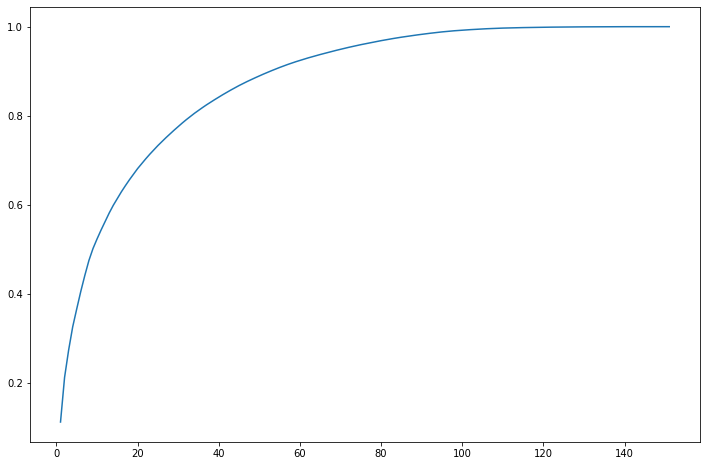

In [554]:
#Plotting the scree plot
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.plot(range(1,len(var_cumu)+1),var_cumu)

In [555]:
# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      11.24 
1      21.26 
2      27.39 
3      32.60 
4      36.65 
5      40.58 
6      44.18 
7      47.52 
8      50.18 
9      52.34 
10     54.36 
11     56.28 
12     58.17 
13     59.89 
14     61.43 
15     62.93 
16     64.32 
17     65.65 
18     66.91 
19     68.14 
20     69.25 
21     70.33 
22     71.37 
23     72.35 
24     73.31 
25     74.21 
26     75.10 
27     75.94 
28     76.77 
29     77.59 
30     78.37 
31     79.13 
32     79.85 
33     80.55 
34     81.20 
35     81.85 
36     82.47 
37     83.05 
38     83.63 
39     84.20 
40     84.74 
41     85.28 
42     85.79 
43     86.30 
44     86.78 
45     87.25 
46     87.69 
47     88.13 
48     88.54 
49     88.96 
50     89.35 
51     89.75 
52     90.12 
53     90.49 
54     90.85 
55     91.19 
56     91.52 
57     91.84 
58     92.14 
59     92.43 
60     92.71 
61     92.99 
62     93.25 
63     93.50 
64     93.75 
65     94.00 
66     94.24 
67     94.47 
68     94.70 
69     94.93 
70     95.15 
71    

We used scree plot, a line plot of the eigenvalues of factors or principal components found in the analysis. The scree plot is used to determine the number of factors to retain principal components to keep in a principal component analysis (PCA). We decided to keep number of components as 60 as we can preserve something around 92% of the total variance of the data.

In [556]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=60)
df_train_pca = pca_final.fit_transform(X_under)
df_train_pca.shape

(3662, 60)

In [557]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(60, 60)

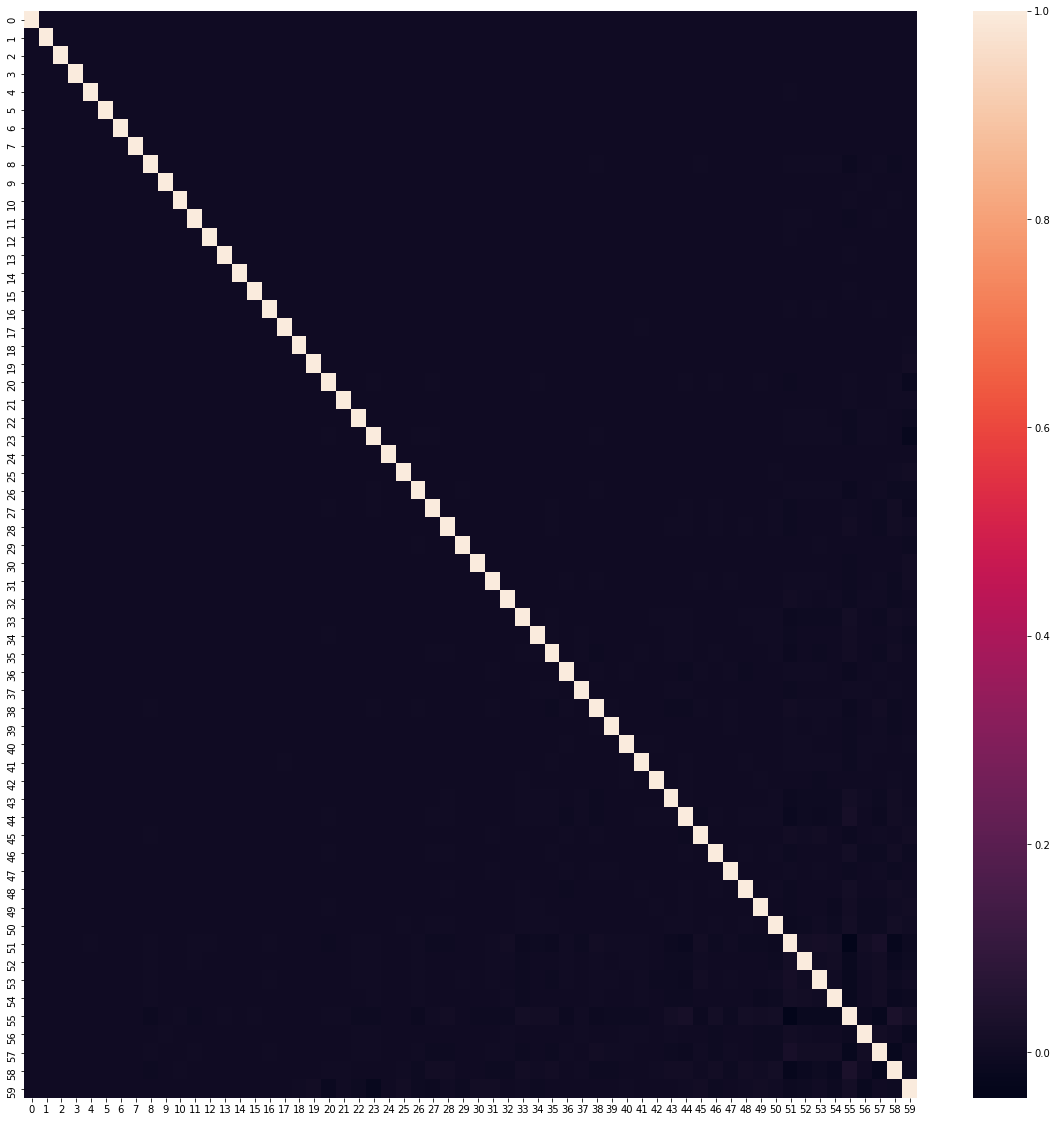

In [327]:
plt.figure(figsize=[20,20])
sns.heatmap(corrmat)

From the above heat map we can see that there is no correlation between the principal components. that is they are linearly uncorrelated. 

Applying this transformation on the test set. 

In [558]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(7501, 60)

### 6.2: Model 2: Good Performance Model: PCA & Logistic Regression. 

#### Applying logistic regression on the data on our Principal components

We will now apply logistic regression on our Principal components. We have class imbalance which we observed earlier in the data with Churned customers to be 8% and Not-Churned customers to be 92%. Failure to account for the class imbalance often causes inaccurate and decreased predictive performance in our logistic algorithm. We have already did stratify while splitting the training and test data. Without resampling the data, one can also make the classifier aware of the imbalanced data by incorporating the weights of the classes into the cost function (aka objective function). Intuitively, we want to give higher weight to minority class and lower weight to majority class.

We will use class_weight='balanced' to account for class imbalance in logistic regression. class_weight='balanced': uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data

In [560]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(class_weight = "balanced")
logreg.fit(df_train_pca , y_under)

y_pred = logreg.predict(df_test_pca)
print("Sensitivty : {}".format(metrics.recall_score(y_test, y_pred)))

Sensitivty : 0.8327868852459016


In [561]:
# create onfusion matrix
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(y_test, y_pred)
print(cmatrix)

[[5551 1340]
 [ 102  508]]


In [562]:
TP = cmatrix[1,1] # true positive
TN = cmatrix[0,0] # true negatives
FP = cmatrix[0,1] # false positives
FN = cmatrix[1,0] # false negatives

In [563]:
print("True Positives (TP) - These are customers in which we predicted will churn and Customers actually Churned:",TP)
print("True Negatives (TN) - We predicted no(customers will not churn) and they don’t churn:",TN)
print("False Positives (FP) - We predicted yes they will Churn, but they don’t churn;Also known as a Type I error:",FP)
print("False Negatives (FN) - We predicted they will not churn, but they actually churned; Also known as a Type II error:",FN)
Accuracy=round(metrics.accuracy_score(y_test, y_pred),2)
print("Accuracy of the model is:", Accuracy)

## Let's calculate Sensistivity. 
Sensitivity=round(TP / float(TP+FN),2)
print("Sensistivity - When it’s actually Churned, how often does it predict Churned: ",Sensitivity)

## Specificity
Specificity=round(TN / float(TN+FP),2)
print("Specificity - When it’s actually not churned, how often does it predict not churned??: ", Specificity)

# Calculate false postive rate
FPR=round(FP/ float(TN+FP),2)
print("False postive rate - predicting Churned when customer does not have Churned:",FPR)

True Positives (TP) - These are customers in which we predicted will churn and Customers actually Churned: 508
True Negatives (TN) - We predicted no(customers will not churn) and they don’t churn: 5551
False Positives (FP) - We predicted yes they will Churn, but they don’t churn;Also known as a Type I error: 1340
False Negatives (FN) - We predicted they will not churn, but they actually churned; Also known as a Type II error: 102
Accuracy of the model is: 0.81
Sensistivity - When it’s actually Churned, how often does it predict Churned:  0.83
Specificity - When it’s actually not churned, how often does it predict not churned??:  0.81
False postive rate - predicting Churned when customer does not have Churned: 0.19


#### Plotting the ROC Curve

A ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [564]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

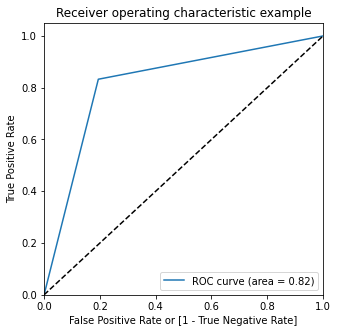

In [565]:
draw_roc(y_test, y_pred)

Our AUC is 0.82 which is a pretty good class seperation capacity.

Lets store the results in a dataframe for easier readability.

In [566]:
pd.set_option('display.max_colwidth', 0)
tempResults = pd.DataFrame({'Model':[2],'Desc':['Good Performance Model : PCA (# components=60) and Logistic Regression (class_weight=balanced)'],'Accuracy':[Accuracy],'Sensitivity':[Sensitivity],'Specificity':[Specificity],'FPR':[FPR],'TP':[TP],'TN':[TN],'FP':[FP],'FN':[FN]})
#results=results[['Model','Desc','Accuracy','Sensitivity','Specificity','FPR','TP','TN','FP','FN']]
results = pd.concat([results, tempResults])
results

,Model,Desc,Accuracy,Sensitivity,Specificity,FPR,TP,TN,FP,FN
0,1,Good Interpretable Model: Basic Logistic Regression without PCA (class_weight=balanced),0.87,0.72,0.88,0.12,439,6043,848,171
0,2,Good Performance Model : PCA (# components=60) and Logistic Regression (class_weight=balanced),0.81,0.83,0.81,0.19,508,5551,1340,102


### 6.2: Model 3: Good Performance Model: PCA with Random Forest & Hyper parameter tuning using GridSearchCV.

In this second model for high performance, we will create a model out of collection of decision trees called random forests by tuning the hyper parameters using the GridSearch Cross validation method. 

In this model building process, we will use the X_train to fit the model derived out of various hyper parameters like, maximum depth of the decision tree, minimum samples to be present in the leaf, on what criteria is the homogeneity measure is supposed to be calculated (GINI or ENTROPY) etc. Then we will use the Random forect classifieer function to fit the train data. 
As part of the Grid Search cross validation, we will use the following to find optimal hyperparameters in the random forest classifier. 

- **min_samples_leaf**: The minimum number of samples to be present in a leaf node. 
- **max_features** : The number of features to consider when looking for the best split. 
- **max_depth** : The maximum depth of the tree. 

In [567]:
# Importing the libraries. 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


In [568]:
# creating the random classifier instance with the class_weight option to handle the class imbalance.

classifier_rf = RandomForestClassifier(class_weight= 'balanced', n_jobs = -1)


1st Hyperparameter Tuning

In [569]:
# Create the parameter grid based on the results of random search 

params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4]
}

In [570]:
# Instantiate the grid search model

grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=5, n_jobs=-1, verbose=1, scoring = "recall")

In [571]:
# Fitting the X_train with PCA and y_train to the grid search.

grid_search.fit(df_train_pca,y_under)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:  2.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              r

In [572]:
# printing the optimal accuracy score and hyperparameters

print('We can get sensitivity of',grid_search.best_score_,'using',grid_search.best_params_)

We can get sensitivity of 0.7881210821756673 using {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 5}


2nd Hyperparameter tuning

In [573]:
# Create the parameter grid based on the results of random search 

params = {
    'max_depth': [3,4, 5, 6,7],
    'min_samples_leaf': [4,5,7,9],
    'max_features': [2,3,4,5]
}

# Instantiate the grid search model

grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=5, n_jobs=-1, verbose=1, scoring = "recall")

# Fitting the X_train with PCA and y_train to the grid search.
grid_search.fit(df_train_pca,y_under)

# printing the optimal accuracy score and hyperparameters
print('We can get sensitivity of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  3.1min finished


We can get sensitivity of 0.7946591027530859 using {'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 7}


We can get sensitivity of 0.7930227364095234 using {'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 7}


3rd hyperparameter tuning.

In [575]:
# Create the parameter grid based on the results of random search 

params = {
    'max_depth': [5,6,7,8],
    'min_samples_leaf': [5,6,7,8],
    'max_features': [5,6,7]
}

# Instantiate the grid search model

grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "recall")

# Fitting the X_train with PCA and y_train to the grid search.
grid_search.fit(df_train_pca,y_under)

# printing the optimal accuracy score and hyperparameters

print('We can get sensitivity of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 4 folds for each of 48 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:  2.4min finished


We can get sensitivity of 0.7908265888221073 using {'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 5}


In [576]:
# predict churn on test data

y_pred = grid_search.predict(df_test_pca)

In [577]:
# Deriving the confusion matrix. 

cmatrix2 = confusion_matrix(y_test, y_pred)
print(cmatrix2)

[[5615 1276]
 [ 122  488]]


In [578]:
TP = cmatrix2[1,1] # true positive
TN = cmatrix2[0,0] # true negatives
FP = cmatrix2[0,1] # false positives
FN = cmatrix2[1,0] # false negatives

In [579]:
print("True Positives (TP) - These are customers in which we predicted will churn and Customers actually Churned:",TP)
print("True Negatives (TN) - We predicted no(customers will not churn) and they don’t churn:",TN)
print("False Positives (FP) - We predicted yes they will Churn, but they don’t churn;Also known as a Type I error:",FP)
print("False Negatives (FN) - We predicted they will not churn, but they actually churned; Also known as a Type II error:",FN)
Accuracy=round(metrics.accuracy_score(y_test, y_pred),2)
print("Accuracy of the model is:", Accuracy)

## Let's calculate Sensistivity. 
Sensitivity=round(TP / float(TP+FN),2)
print("Sensistivity - When it’s actually Churned, how often does it predict Churned: ",Sensitivity)

## Specificity
Specificity=round(TN / float(TN+FP),2)
print("Specificity - When it’s actually not churned, how often does it predict not churned??: ", Specificity)

# Calculate false postive rate
FPR=round(FP/ float(TN+FP),2)
print("False postive rate - predicting Churned when customer does not have Churned:",FPR)

True Positives (TP) - These are customers in which we predicted will churn and Customers actually Churned: 488
True Negatives (TN) - We predicted no(customers will not churn) and they don’t churn: 5615
False Positives (FP) - We predicted yes they will Churn, but they don’t churn;Also known as a Type I error: 1276
False Negatives (FN) - We predicted they will not churn, but they actually churned; Also known as a Type II error: 122
Accuracy of the model is: 0.81
Sensistivity - When it’s actually Churned, how often does it predict Churned:  0.8
Specificity - When it’s actually not churned, how often does it predict not churned??:  0.81
False postive rate - predicting Churned when customer does not have Churned: 0.19


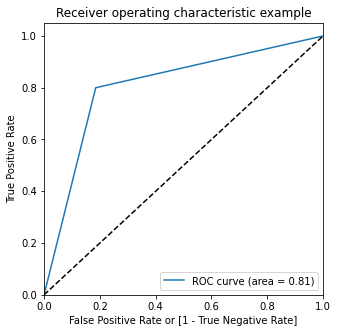

In [580]:
draw_roc(y_test, y_pred)

Our AUC in this model is 0.81 which is a good model. 

In [581]:
pd.set_option('display.max_colwidth', 0)
tempResults = pd.DataFrame({'Model':[3],'Desc':['Hyperparameter and Random Forest Classifier )'],'Accuracy':[Accuracy],'Sensitivity':[Sensitivity],'Specificity':[Specificity],'FPR':[FPR],'TP':[TP],'TN':[TN],'FP':[FP],'FN':[FN]})
results = pd.concat([results, tempResults])
results

,Model,Desc,Accuracy,Sensitivity,Specificity,FPR,TP,TN,FP,FN
0,1,Good Interpretable Model: Basic Logistic Regression without PCA (class_weight=balanced),0.87,0.72,0.88,0.12,439,6043,848,171
0,2,Good Performance Model : PCA (# components=60) and Logistic Regression (class_weight=balanced),0.81,0.83,0.81,0.19,508,5551,1340,102
0,3,Hyperparameter and Random Forest Classifier ),0.81,0.80,0.81,0.19,488,5615,1276,122


### 6.2: Model 4: Good Performance Model: PCA with XGBoost with hyperparameter tuning. 

In [582]:
# importing necessary libraries. 

import xgboost as xgb
from sklearn import metrics
from sklearn import model_selection



In [584]:
scorer = metrics.make_scorer(metrics.accuracy_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

In [583]:
# Hyper parameter tuning with various values.

parameters = {'learning_rate': [0.1, 0.2, 0.3],
              'max_depth': [2, 4, 6, 8, 10],
              'min_child_weight': [3, 7, 11, 20]
            }

In [588]:
xgb_model = xgb.XGBClassifier()

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,verbose = 1,
                                       cv=4,
                                       
                                       refit=True)

clf_xgb.fit(df_train_pca, y_under)

Fitting 4 folds for each of 60 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  5.9min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_child_weight': [3, 7, 11, 20]},
  

In [589]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)


{'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 7}
0.8110333595819313
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


2nd Hyper parameter Tuning 

In [594]:
# Hyper parameter tuning with various values.

parameters = {'learning_rate': [0.1, 0.2, 0.3],
              'max_depth': [5,6,7],
              'min_child_weight': [5,6,7,8,9]
            }
xgb_model = xgb.XGBClassifier()

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,verbose = 1,
                                       cv=4,
                                       
                                       refit=True)

clf_xgb.fit(df_train_pca, y_under)

Fitting 4 folds for each of 45 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.0min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [5, 6, 7],
                         'min_child_weight': [5, 6, 7, 8, 9]},
        

In [595]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 7}
0.8110333595819313
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


Making Final model in XGboost classifier with best hyper parameters.

In [597]:
xgb_model = xgb.XGBClassifier()

# best hyperparameters
parameters = {'learning_rate': [0.2],
              'max_depth': [6],
              'min_child_weight': [7],
              'n_estimators': [100]}



clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=4,
                                       refit=True)

clf_xgb.fit(df_train_pca, y_under)

GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.2], 'max_depth': [6],
                         'min_child_weight': [7], 'n_estimators': [100]},
             pre_dispatch='2*n_jobs', 

In [598]:
# Deriving the confusion matrix. 
y_pred = clf_xgb.predict(df_test_pca)

cmatrix3 = confusion_matrix(y_test, y_pred)
print(cmatrix3)

[[5632 1259]
 [ 106  504]]


In [599]:
TP = cmatrix3[1,1] # true positive
TN = cmatrix3[0,0] # true negatives
FP = cmatrix3[0,1] # false positives
FN = cmatrix3[1,0] # false negatives

In [600]:
print("True Positives (TP) - These are customers in which we predicted will churn and Customers actually Churned:",TP)
print("True Negatives (TN) - We predicted no(customers will not churn) and they don’t churn:",TN)
print("False Positives (FP) - We predicted yes they will Churn, but they don’t churn;Also known as a Type I error:",FP)
print("False Negatives (FN) - We predicted they will not churn, but they actually churned; Also known as a Type II error:",FN)
Accuracy=round(metrics.accuracy_score(y_test, y_pred),2)
print("Accuracy of the model is:", Accuracy)

## Let's calculate Sensistivity. 
Sensitivity=round(TP / float(TP+FN),2)
print("Sensistivity - When it’s actually Churned, how often does it predict Churned: ",Sensitivity)

## Specificity
Specificity=round(TN / float(TN+FP),2)
print("Specificity - When it’s actually not churned, how often does it predict not churned??: ", Specificity)

# Calculate false postive rate
FPR=round(FP/ float(TN+FP),2)
print("False postive rate - predicting Churned when customer does not have Churned:",FPR)

True Positives (TP) - These are customers in which we predicted will churn and Customers actually Churned: 504
True Negatives (TN) - We predicted no(customers will not churn) and they don’t churn: 5632
False Positives (FP) - We predicted yes they will Churn, but they don’t churn;Also known as a Type I error: 1259
False Negatives (FN) - We predicted they will not churn, but they actually churned; Also known as a Type II error: 106
Accuracy of the model is: 0.82
Sensistivity - When it’s actually Churned, how often does it predict Churned:  0.83
Specificity - When it’s actually not churned, how often does it predict not churned??:  0.82
False postive rate - predicting Churned when customer does not have Churned: 0.18


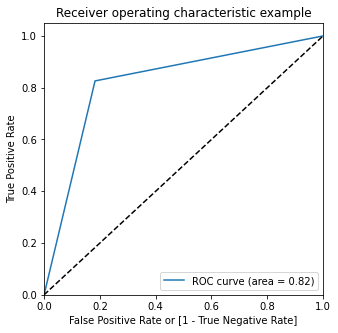

In [602]:
# plot roc curve
draw_roc(y_test, y_pred)

Our AUC for this model is: 0.82

In [603]:
pd.set_option('display.max_colwidth', 0)
tempResults = pd.DataFrame({'Model':[3],'Desc':['Hyperparameter and XGBoost Classifier '],'Accuracy':[Accuracy],'Sensitivity':[Sensitivity],'Specificity':[Specificity],'FPR':[FPR],'TP':[TP],'TN':[TN],'FP':[FP],'FN':[FN]})
results = pd.concat([results, tempResults])
results

,Model,Desc,Accuracy,Sensitivity,Specificity,FPR,TP,TN,FP,FN
0,1,Good Interpretable Model: Basic Logistic Regression without PCA (class_weight=balanced),0.87,0.72,0.88,0.12,439,6043,848,171
0,2,Good Performance Model : PCA (# components=60) and Logistic Regression (class_weight=balanced),0.81,0.83,0.81,0.19,508,5551,1340,102
0,3,Hyperparameter and Random Forest Classifier ),0.81,0.80,0.81,0.19,488,5615,1276,122
0,3,Hyperparameter and XGBoost Classifier,0.82,0.83,0.82,0.18,504,5632,1259,106


Observation:
- We can can see without PCA the sensitivity of model is less i.e 72%.
- With PCA sensitivity of model is 83% with XGBoost and Logistic Regression.


## Recommendation:

Model:
Based on Sensitivity , Accuracy and ROC_AUC  

In [ ]:
results.head()

ROC_AUC:
  - Logistic Regression = 0.82
  - Random Forest = 0.81
  - XgBoost - 0.82

Sensitivity:
  - Logistic Regression = 0.83
  - Random Forest = 0.80
  - XgBoost - 0.83

Accuarcy :
  - Logistic Regression = 0.81
  - Random Forest = 0.81
  - XgBoost - 0.82

Model Recommendation :
We can see Xgboost and logistic regression is almost same. But with high sensitivity if we get better accuracy that is even better . So based on this three metrics the best model recommneded is __XGBoost Classifier__

Feature recommendation: Based on the logistic regression without PCA with low p -values and low VIF ,we got 13 features.<br>
These 13 features are ranked on basis of VIF in ascending order : 
  - 'spl_ic_mou_8',
  - 'total_rech_amt_call_plus_data_6',
  - 'std_ic_mou_8',
  - 'std_og_t2t_mou_8',
  - 'loc_ic_t2f_mou_8',
  - 'last_day_rch_amt_8',
  - 'count_rech_2g_8',
  - 'loc_ic_t2t_mou_8',
  - 'fb_user_8',
  - 'loc_og_t2t_mou_8',
  - 'loc_og_t2m_mou_8',
  - 'std_og_t2m_mou_8',
  - 'offnet_mou_7'

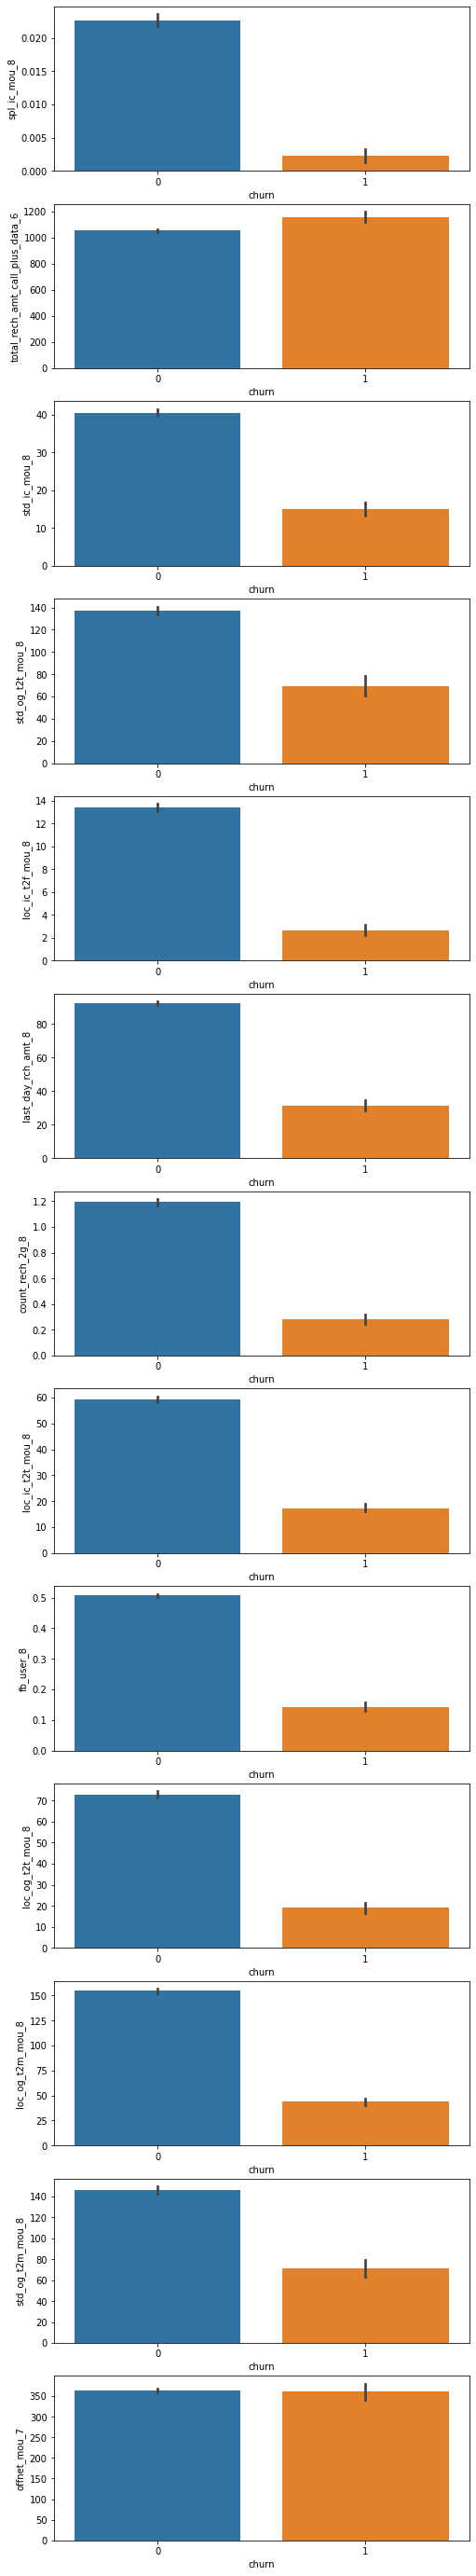

In [612]:
plt.figure(figsize = [8,50])
for i in range(len(top_13_features)):
    plt.subplot(13,1,i+1)
    sns.barplot(x= 'churn', y = top_13_features[i], data = churn_final)
plt.show()